In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


In [4]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import missingno as mn

# ****File Introduction****

In [5]:
df =  pd.read_csv(r'/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

In [6]:
df

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21   NaN     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[5110 rows x 12 columns]

In [22]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [7]:
# lets check all stats
df.describe()

id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

We can see that there are missing values and errors in the data which we have to first recitfy and further confirm as we can see above that the count of bmi does not match the  count of the remaining attributes

In [8]:
# lets check for null values 
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

# No lets fill in the missing values

<AxesSubplot:>

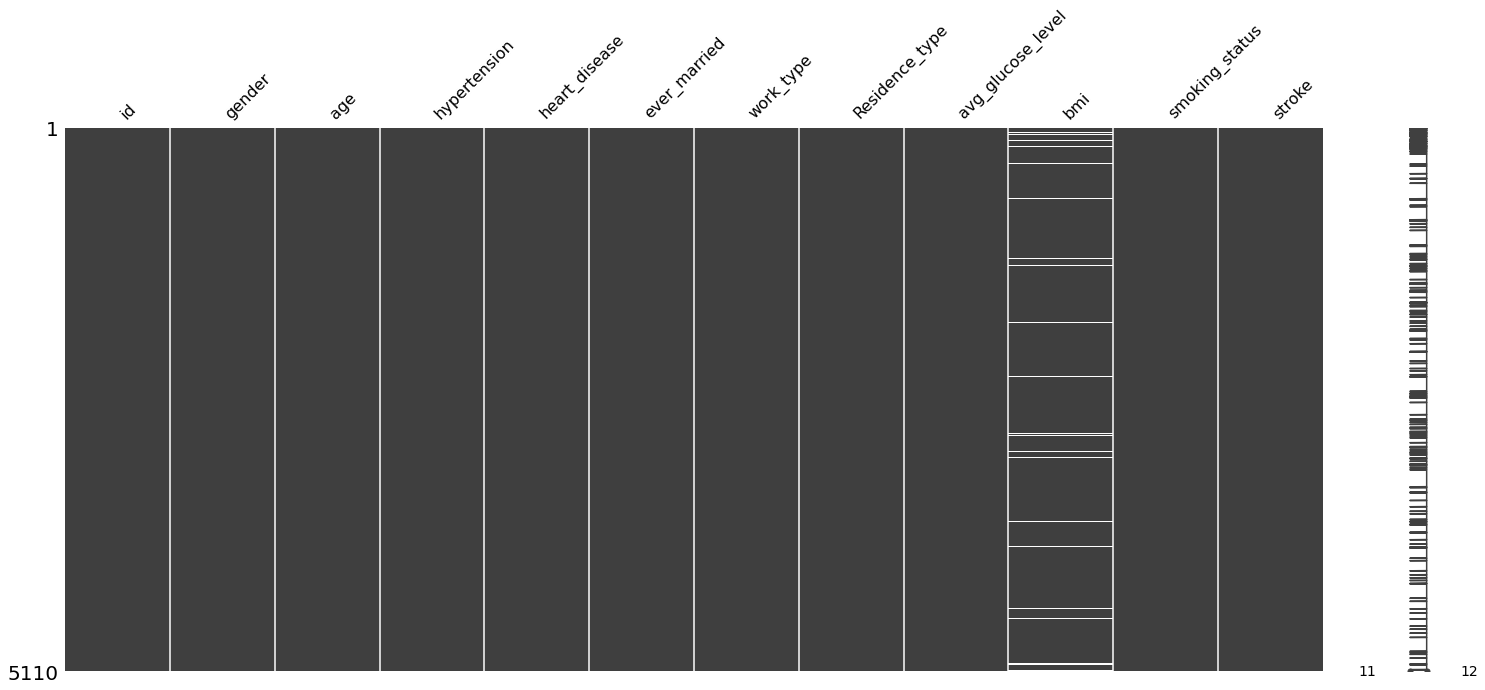

In [9]:
# we need to first examine connections of missing values 
mn.matrix(df)

<AxesSubplot:>

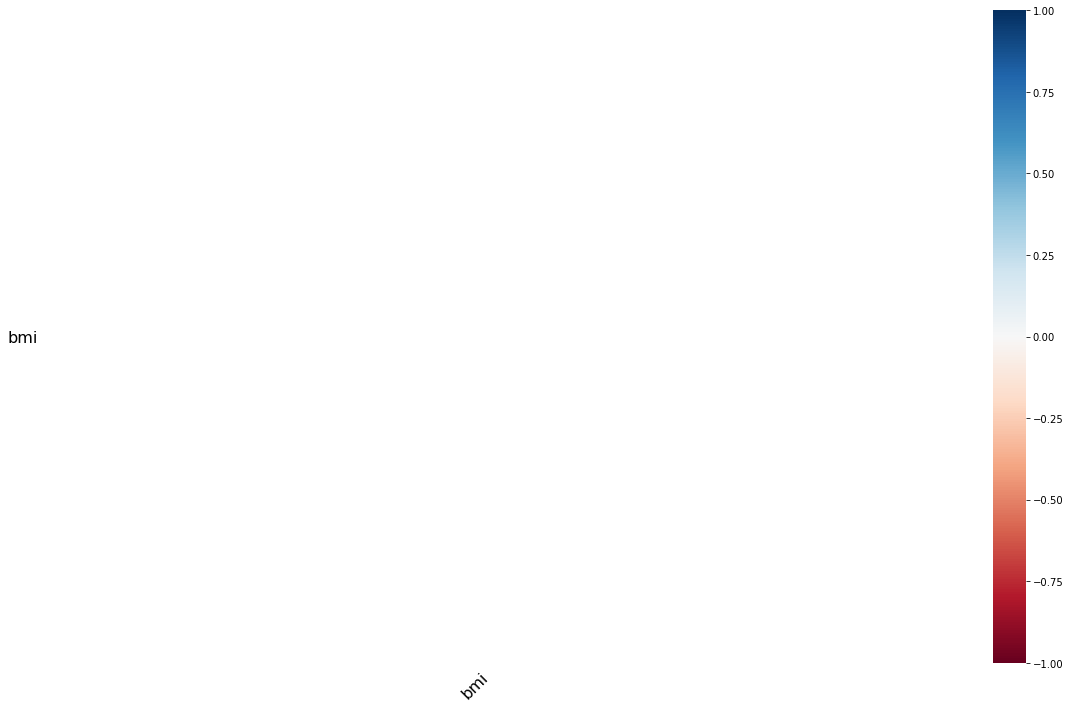

In [10]:
mn.heatmap(df)

<AxesSubplot:>

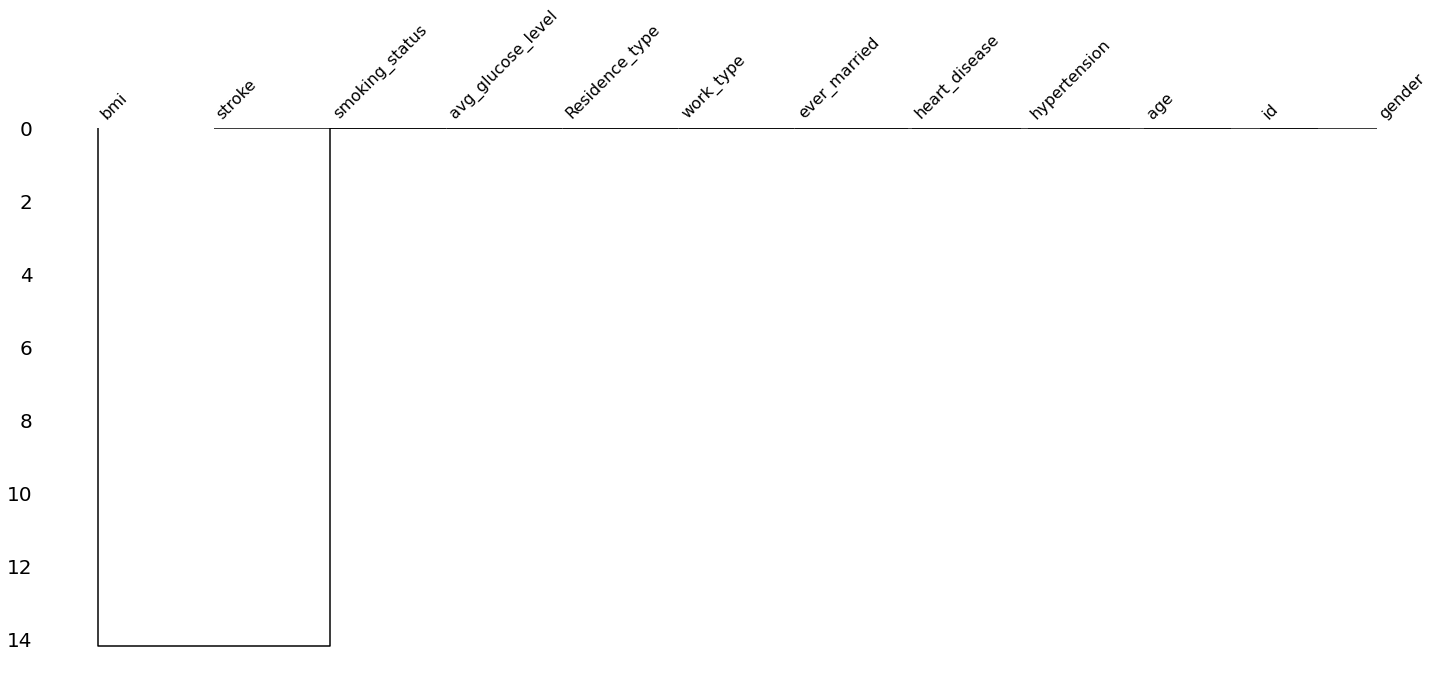

In [11]:
mn.dendrogram(df)

In [12]:
# so we can fill bmi's missing values with smoking_status vlues as we can see the connection from the dendrogram
df[df['bmi'].isnull()]['smoking_status'].value_counts()

Unknown            61
smokes             52
formerly smoked    48
never smoked       40
Name: smoking_status, dtype: int64

(array([ 411., 1964., 1809.,  575.,  105.,   37.,    4.,    2.,    0.,
           2.]),
 array([10.3 , 19.03, 27.76, 36.49, 45.22, 53.95, 62.68, 71.41, 80.14,
        88.87, 97.6 ]),
 <BarContainer object of 10 artists>)

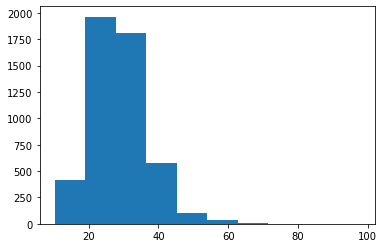

In [13]:
from matplotlib import pyplot as plt
plt.hist(df['bmi'])

In [14]:
# Since the data Above it too diversified its not safe to fill using just one cateogry with the remaining missing values
# instead we shall use interpolation to fetch the nearest form of data to fill the missing values
df['bmi'] = df['bmi'].interpolate(method ='linear', limit_direction='forward')

In [15]:
# lets check if that worked 
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Thus we have no filled all missing values and now we conduct exploratory data analysis

# Exploratory Data Analysis

In [33]:
# lets check all correlations here 
df.corr()

id       age  hypertension  heart_disease  \
id                 1.000000  0.003538      0.003550      -0.001296   
age                0.003538  1.000000      0.276398       0.263796   
hypertension       0.003550  0.276398      1.000000       0.108306   
heart_disease     -0.001296  0.263796      0.108306       1.000000   
avg_glucose_level  0.001092  0.238171      0.174474       0.161857   
bmi                0.000925  0.321631      0.149985       0.044599   
stroke             0.006388  0.245257      0.127904       0.134914   

                   avg_glucose_level       bmi    stroke  
id                          0.001092  0.000925  0.006388  
age                         0.238171  0.321631  0.245257  
hypertension                0.174474  0.149985  0.127904  
heart_disease               0.161857  0.044599  0.134914  
avg_glucose_level           1.000000  0.168539  0.131945  
bmi                         0.168539  1.000000  0.047351  
stroke                      0.131945  0.047351  1.000000

In [32]:
# lets groupby bmi
# to get more insights on interelated health variables together through visualization
health_status = df.groupby(by = 'bmi')

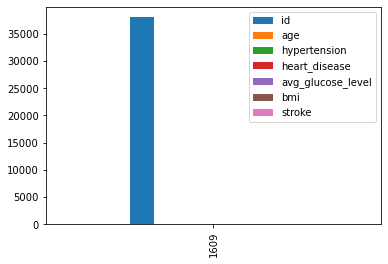

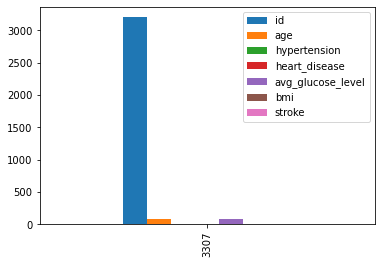

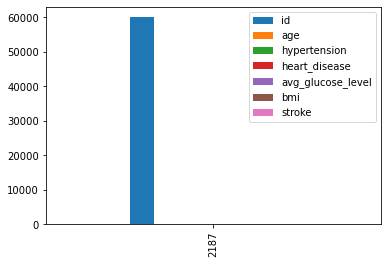

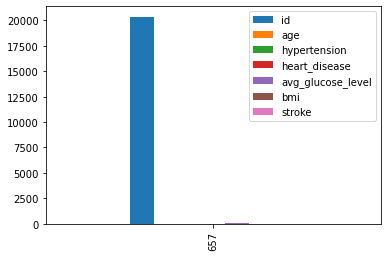

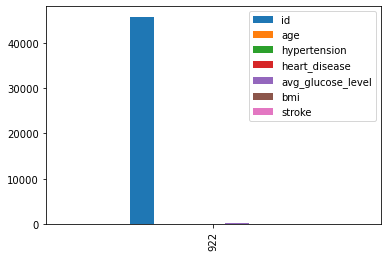

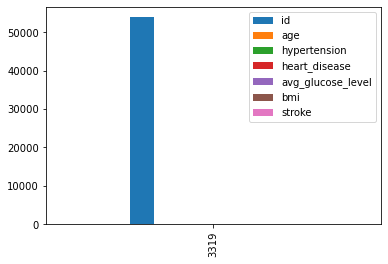

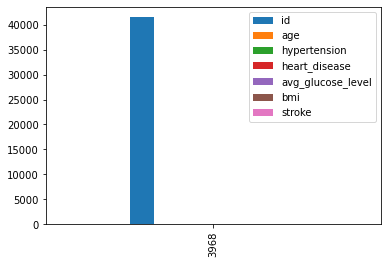

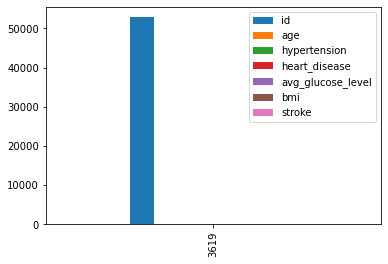

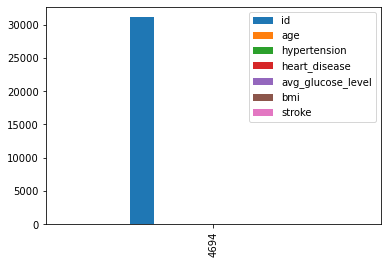

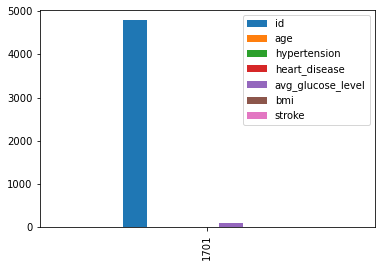

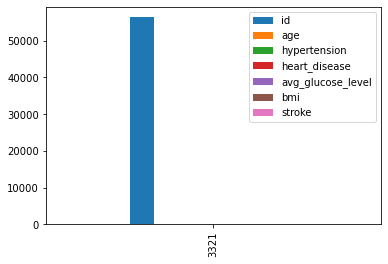

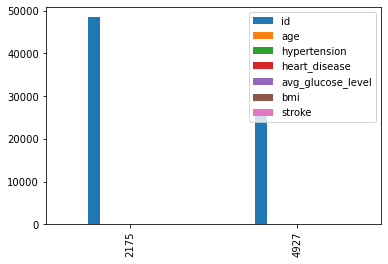

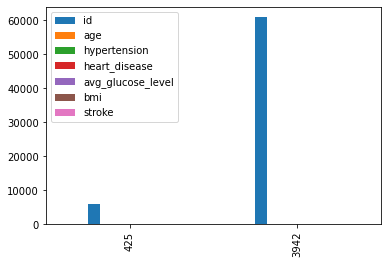

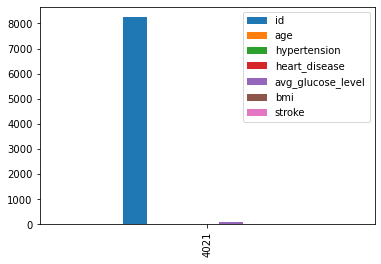

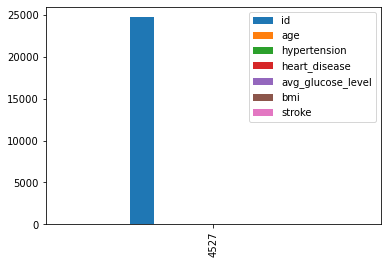

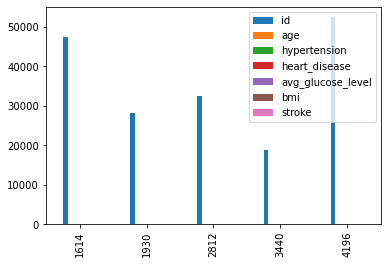

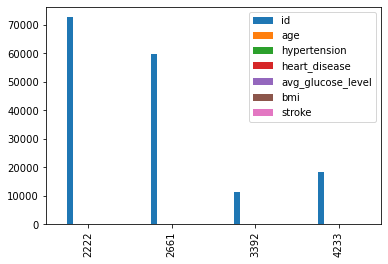

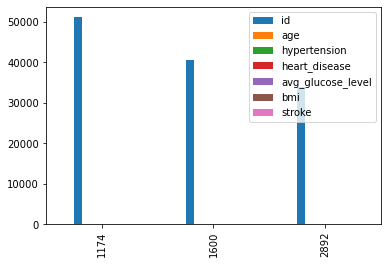

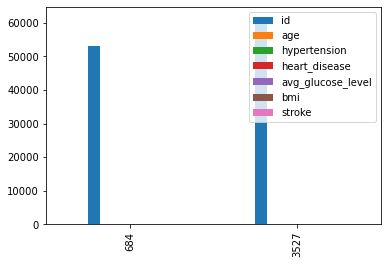

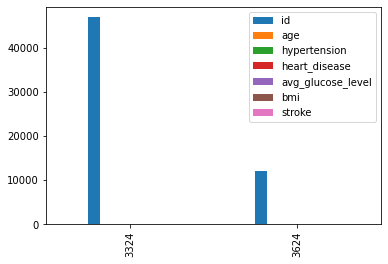

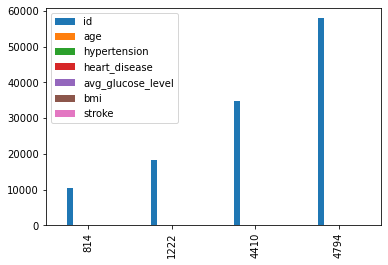

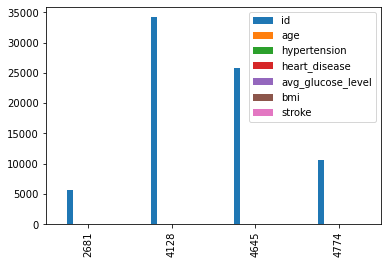

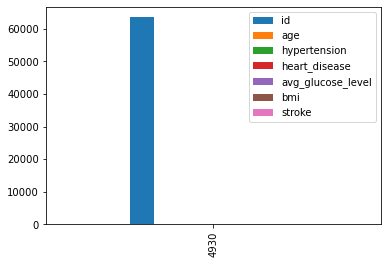

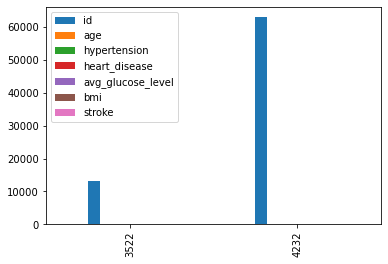

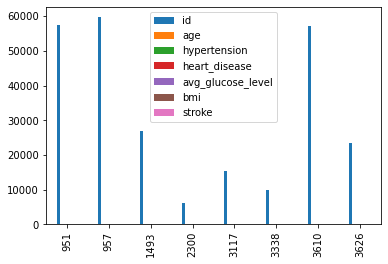

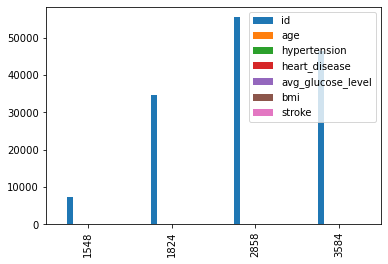

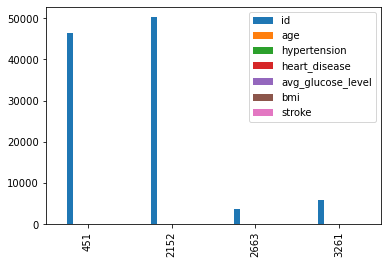

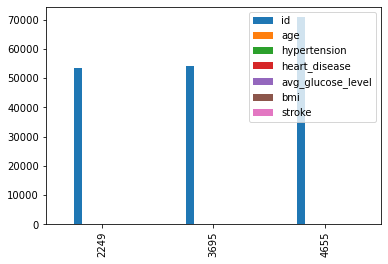

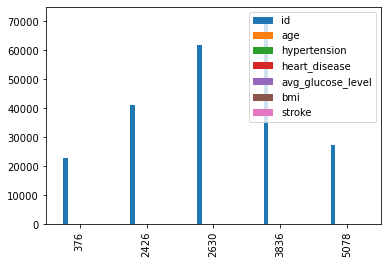

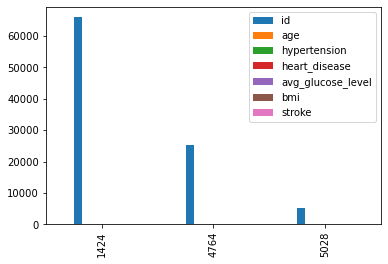

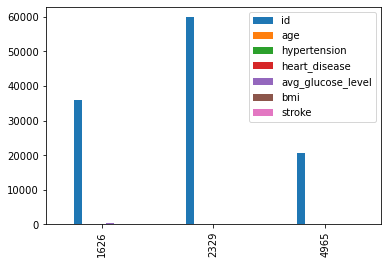

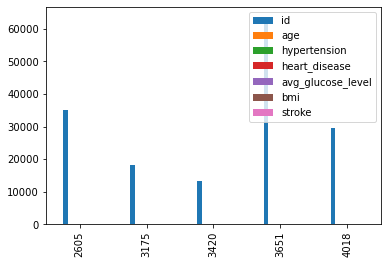

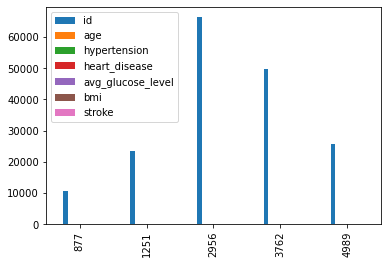

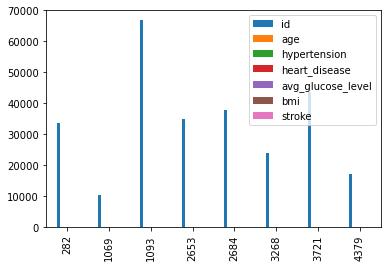

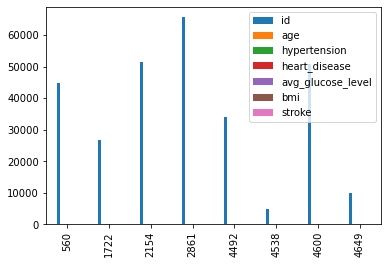

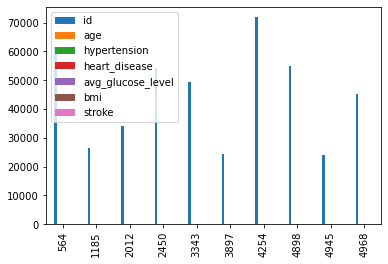

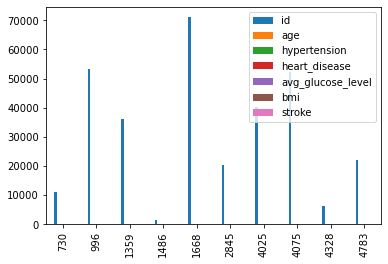

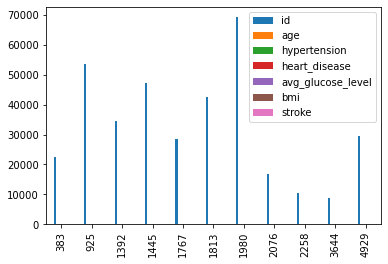

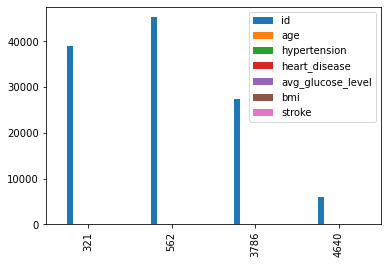

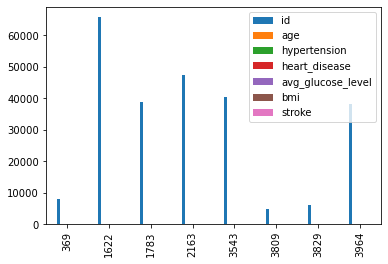

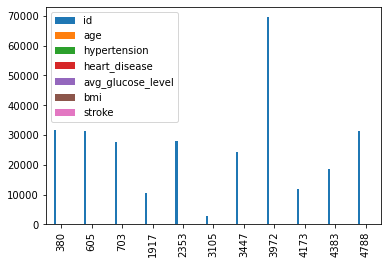

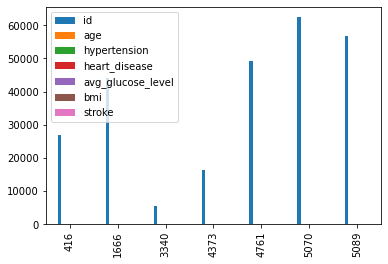

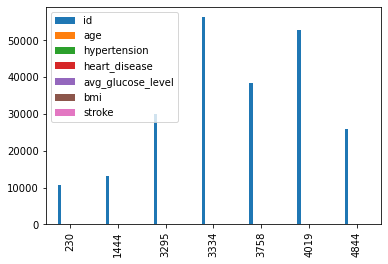

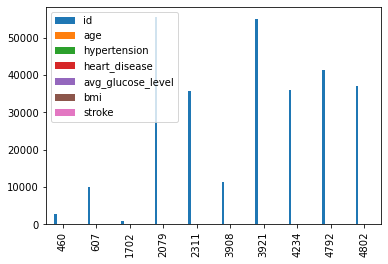

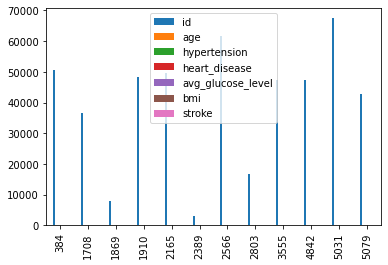

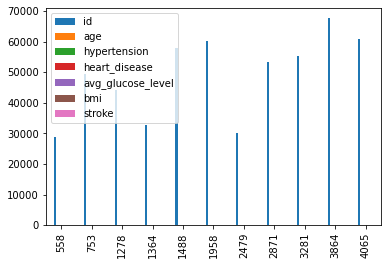

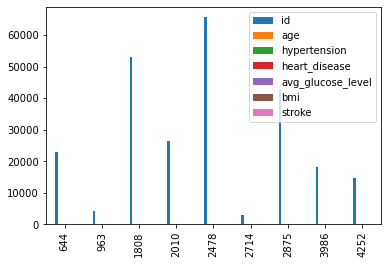

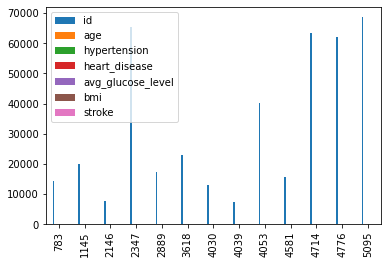

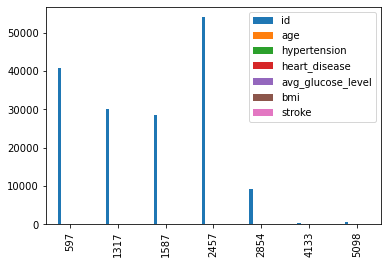

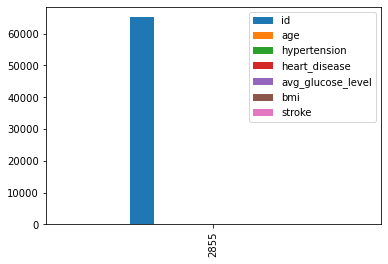

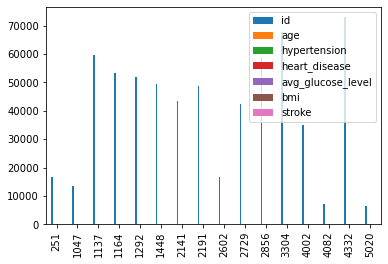

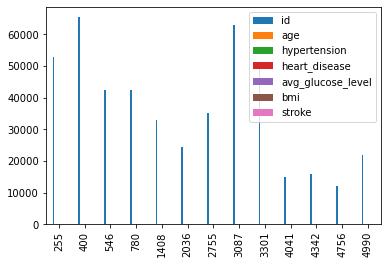

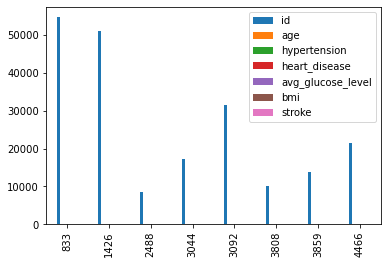

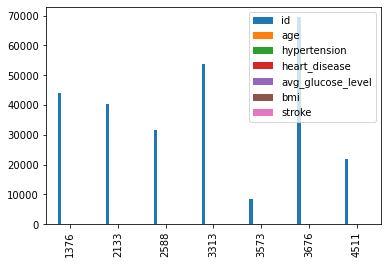

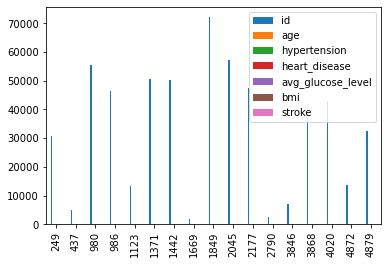

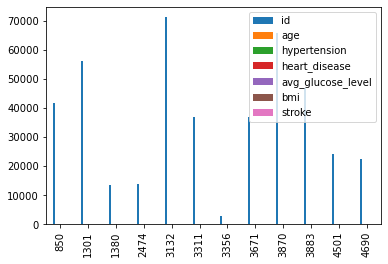

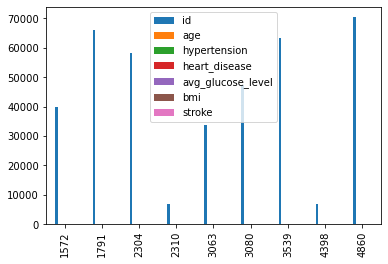

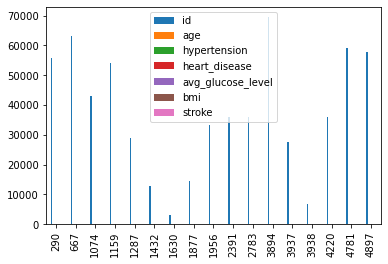

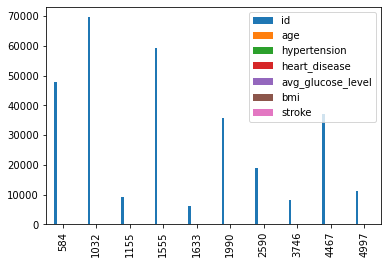

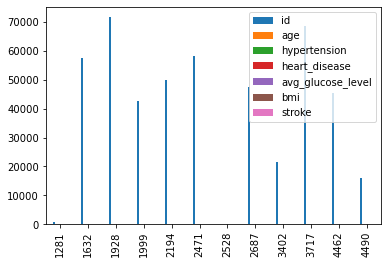

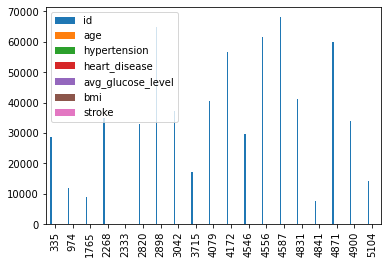

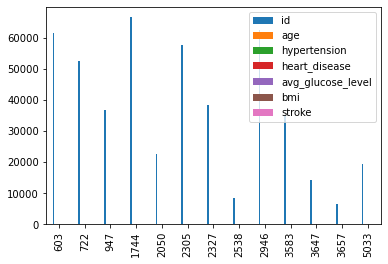

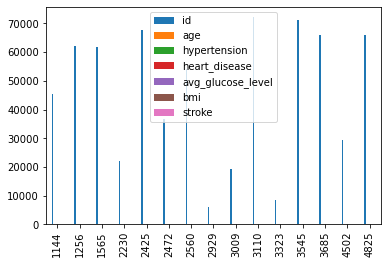

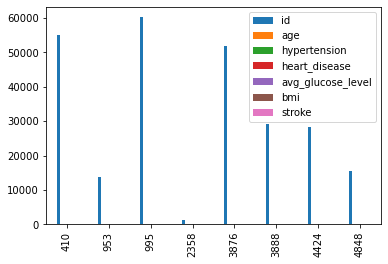

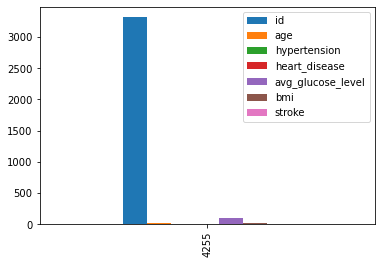

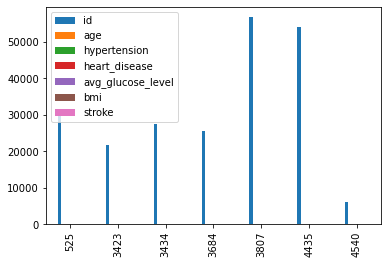

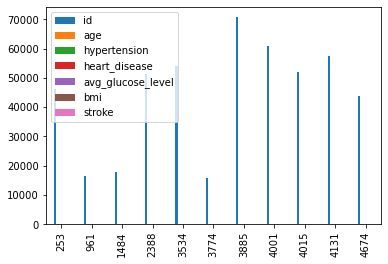

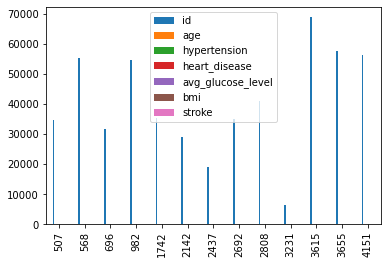

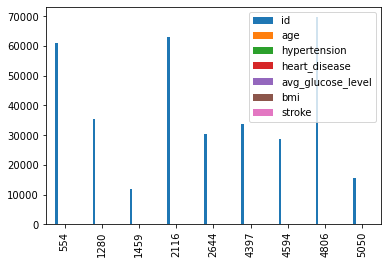

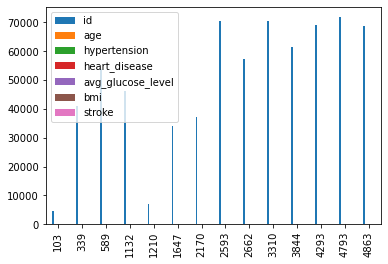

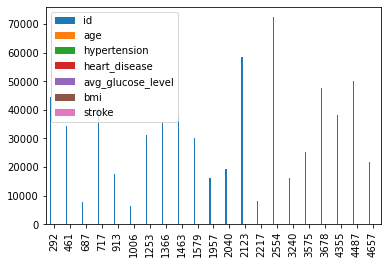

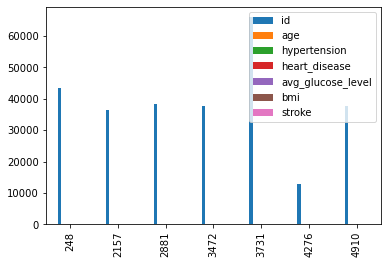

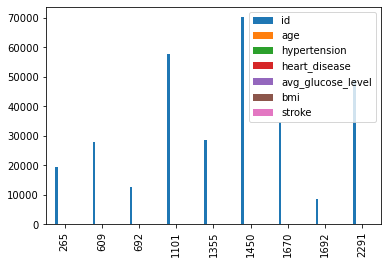

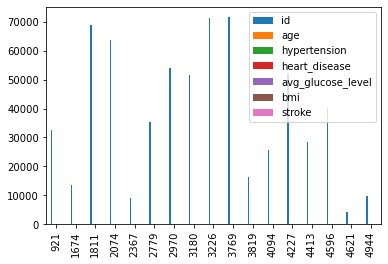

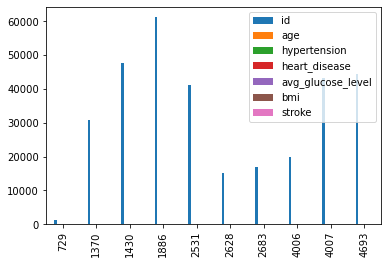

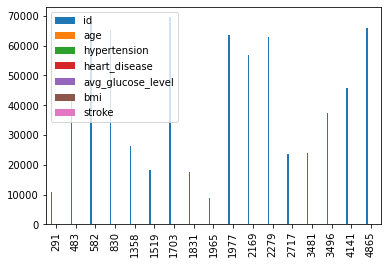

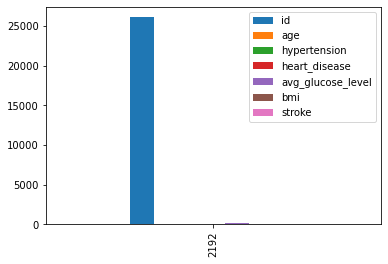

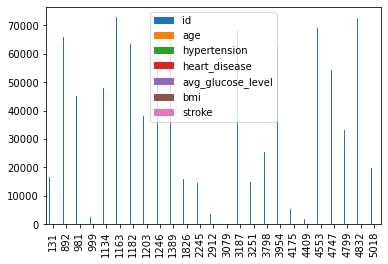

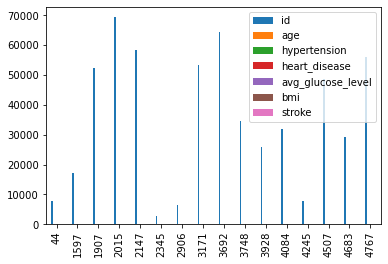

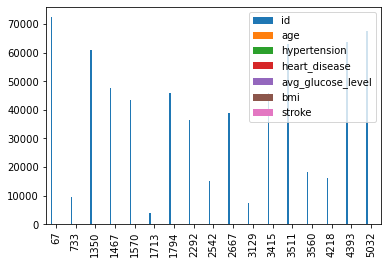

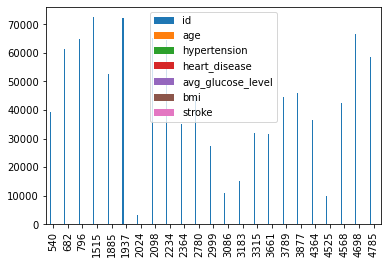

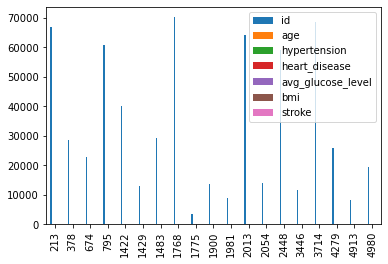

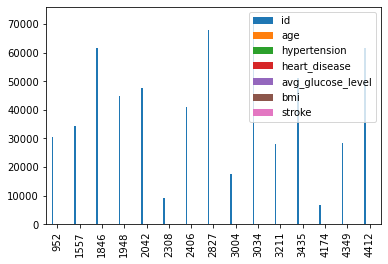

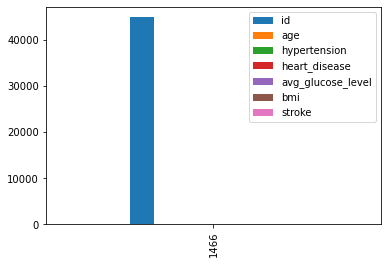

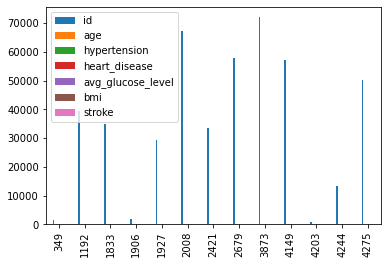

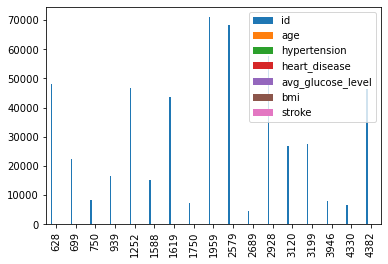

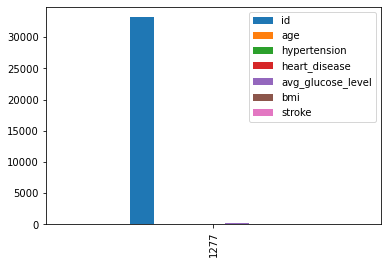

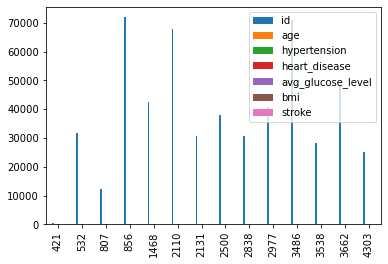

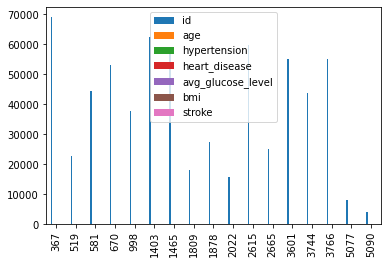

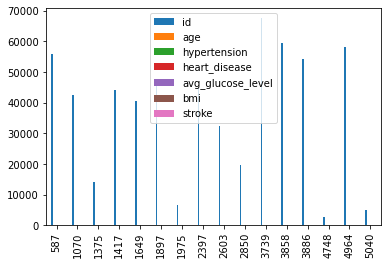

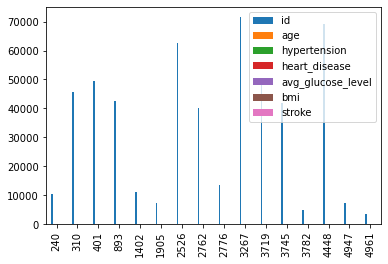

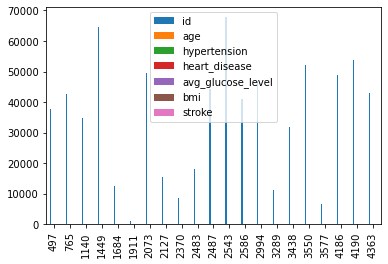

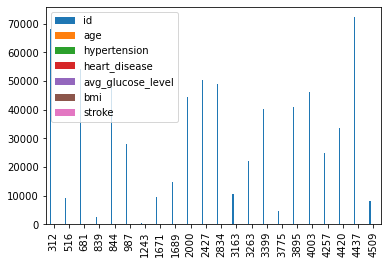

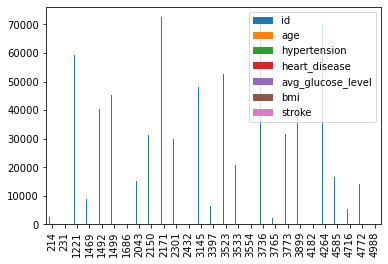

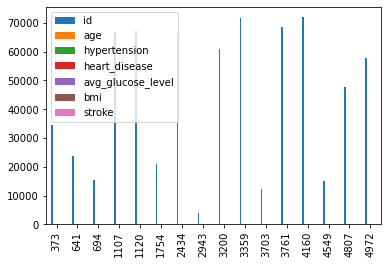

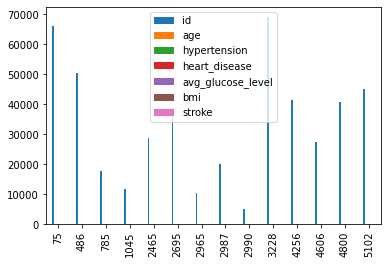

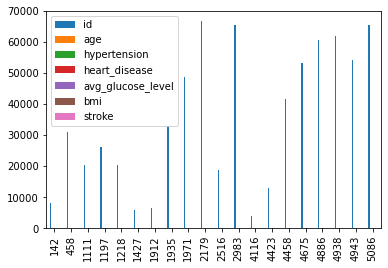

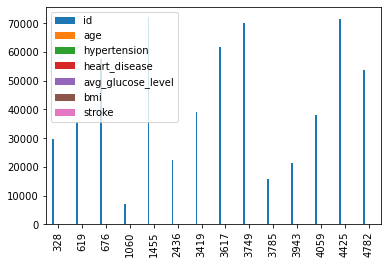

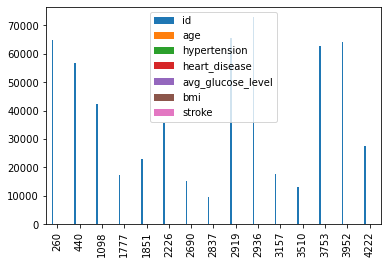

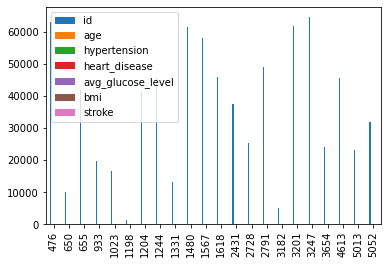

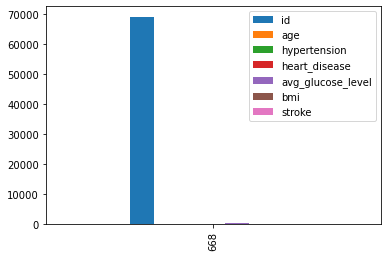

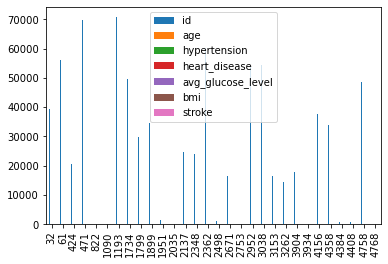

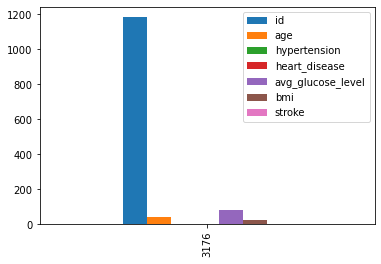

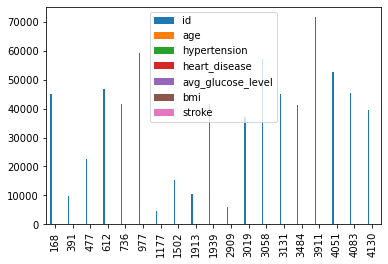

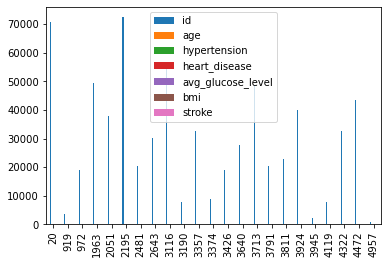

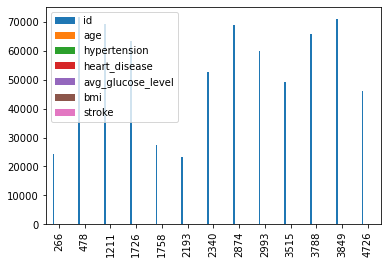

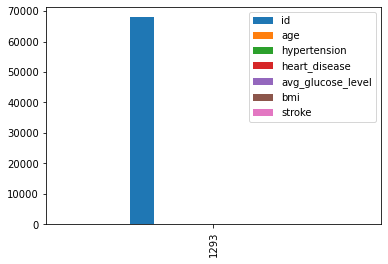

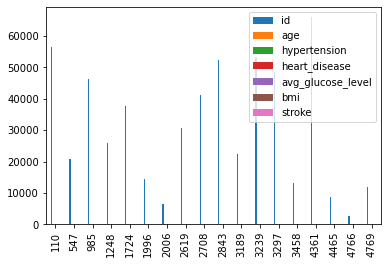

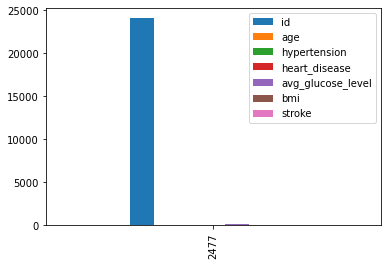

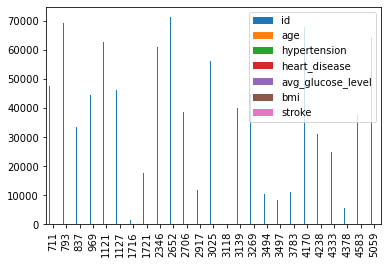

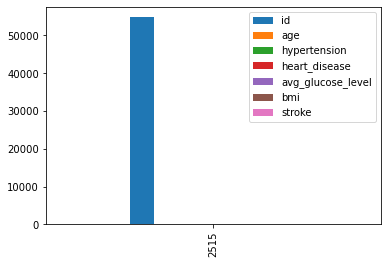

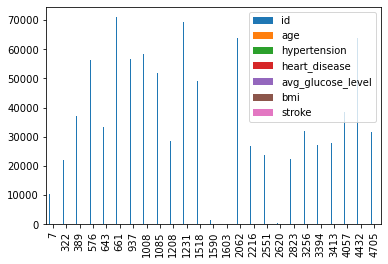

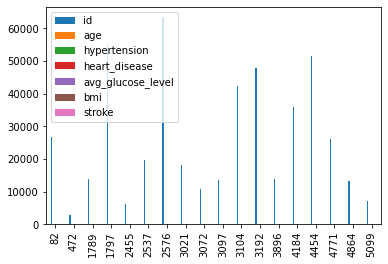

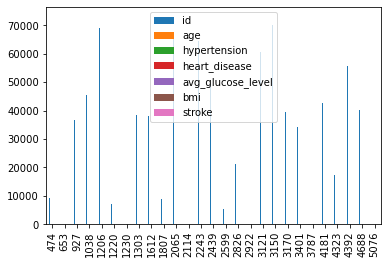

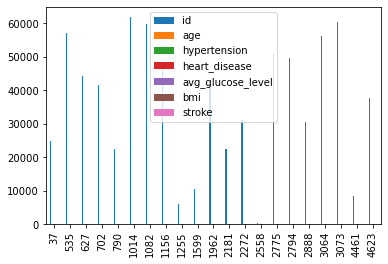

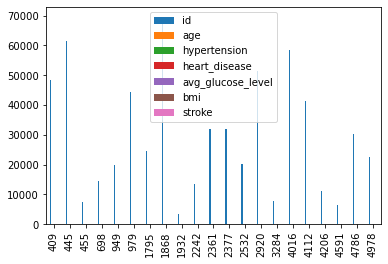

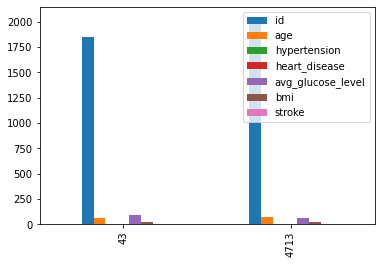

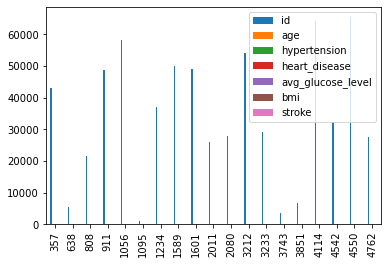

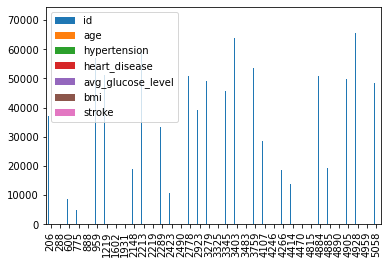

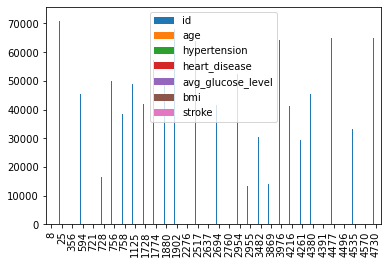

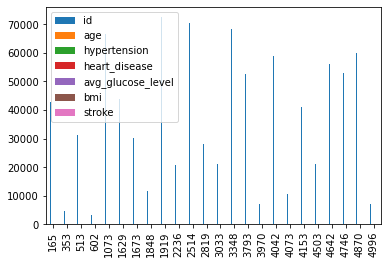

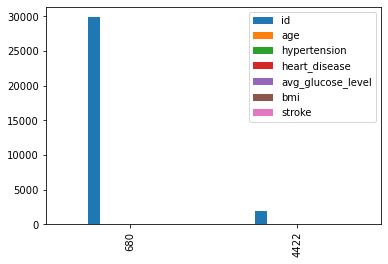

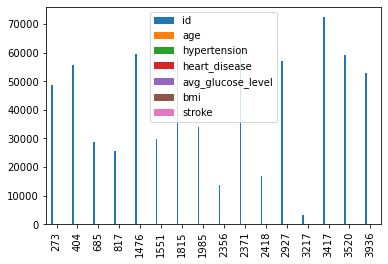

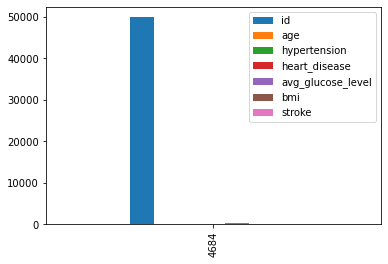

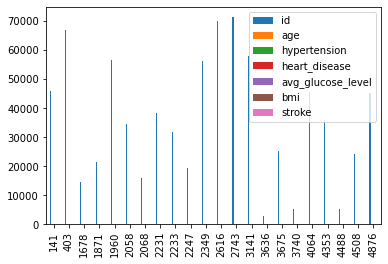

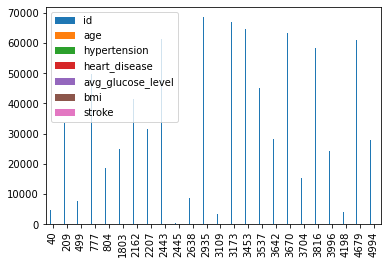

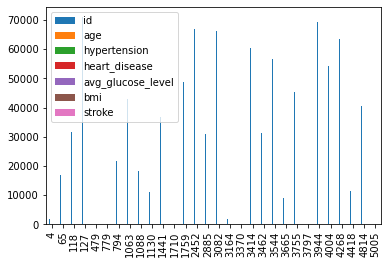

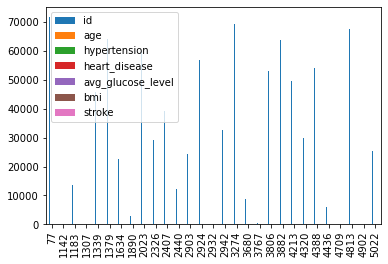

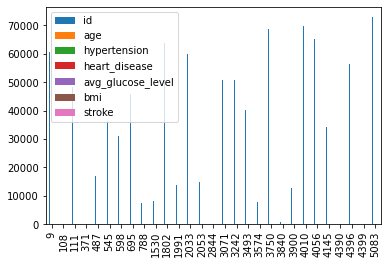

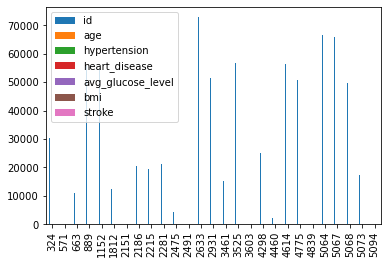

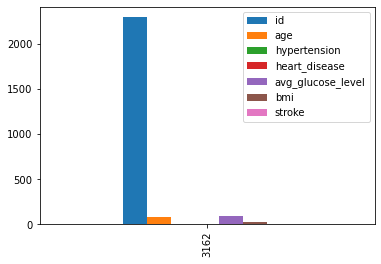

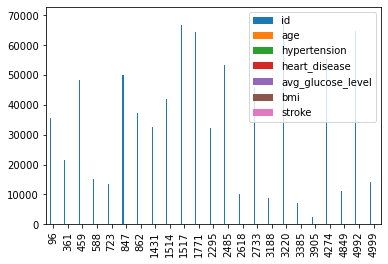

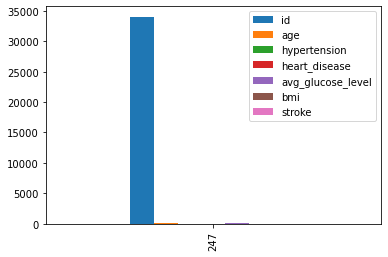

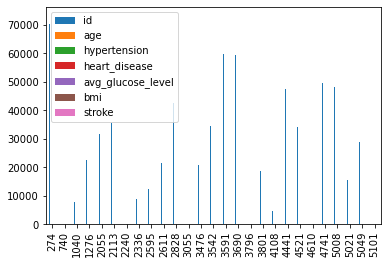

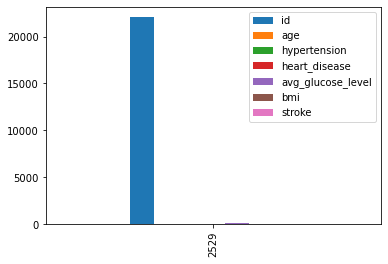

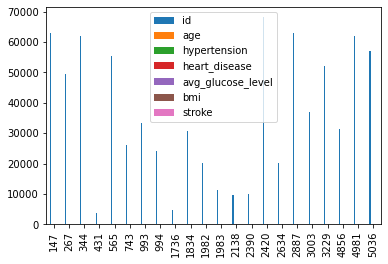

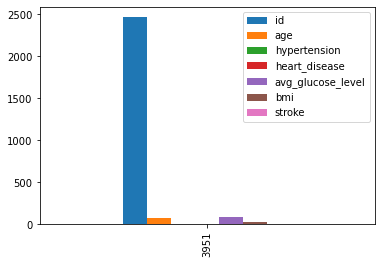

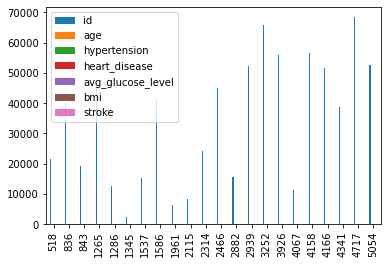

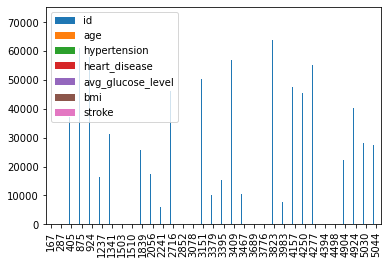

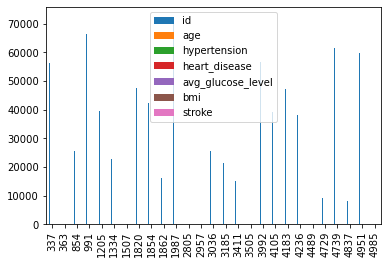

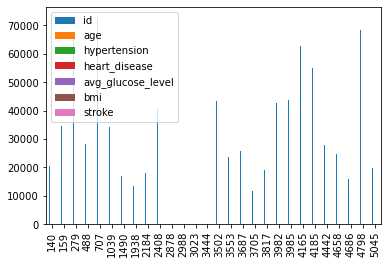

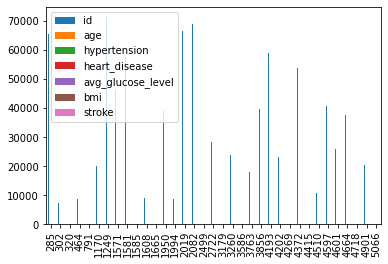

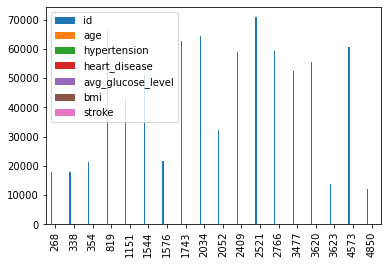

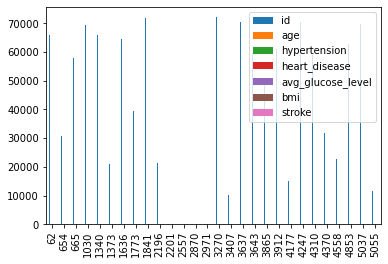

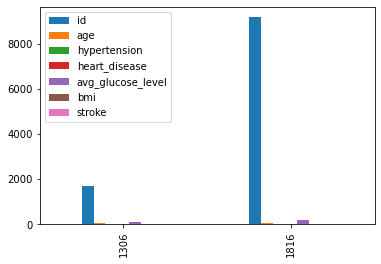

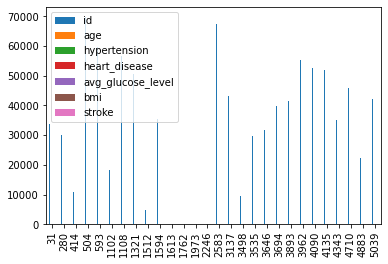

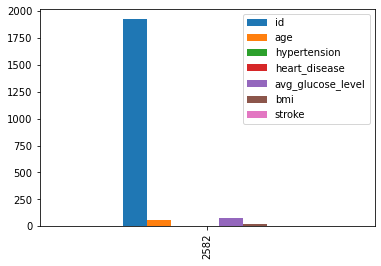

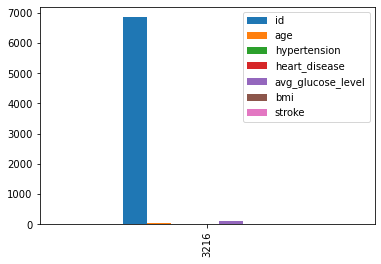

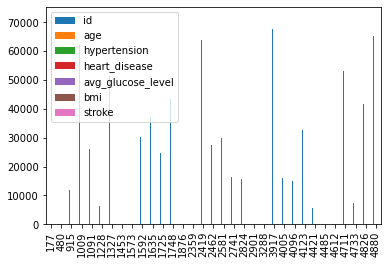

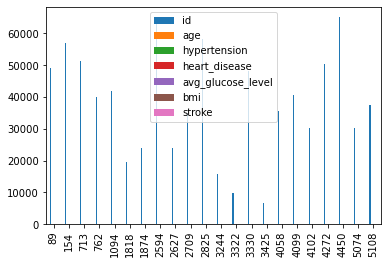

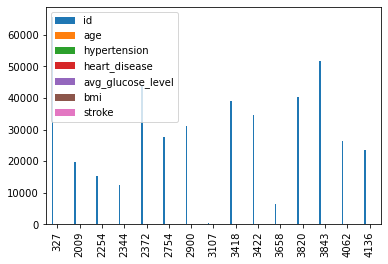

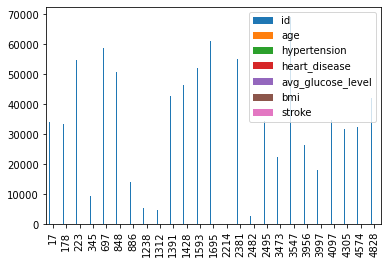

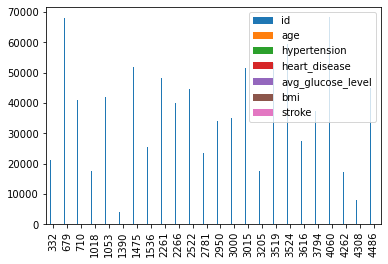

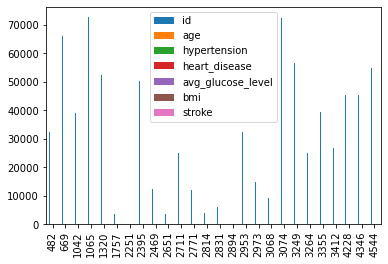

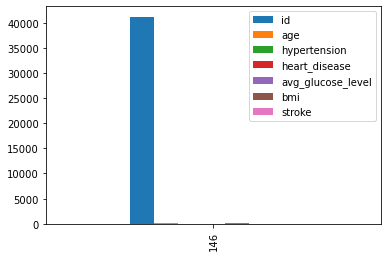

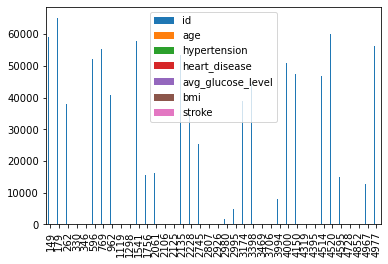

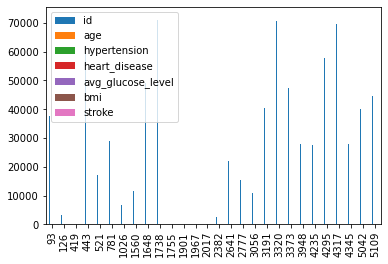

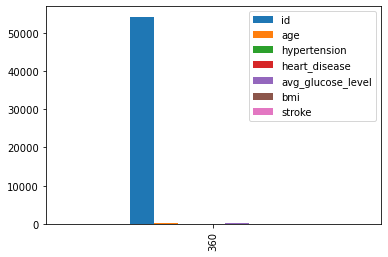

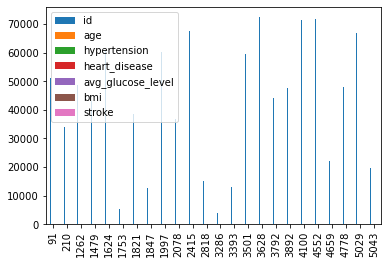

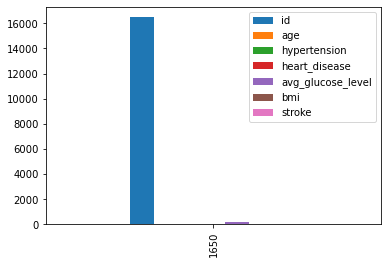

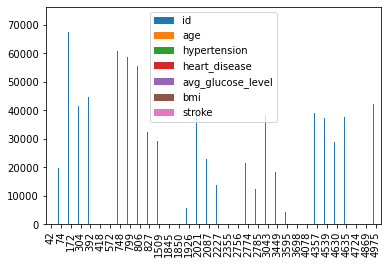

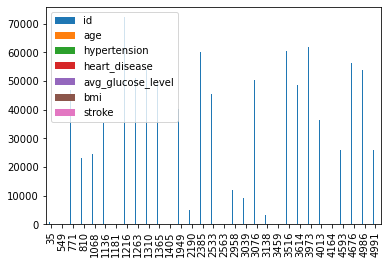

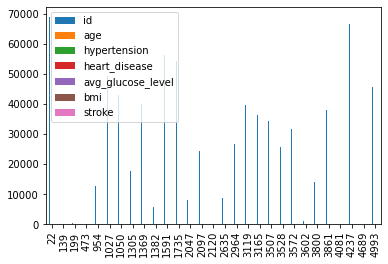

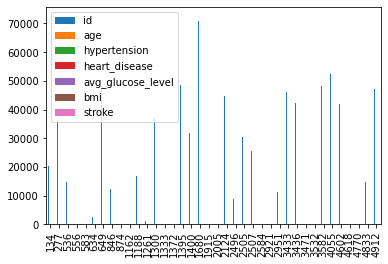

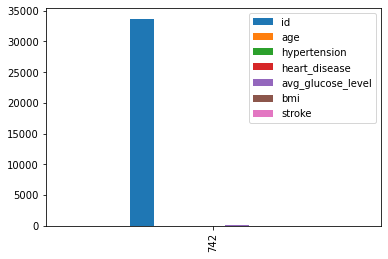

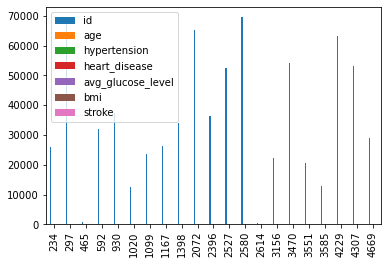

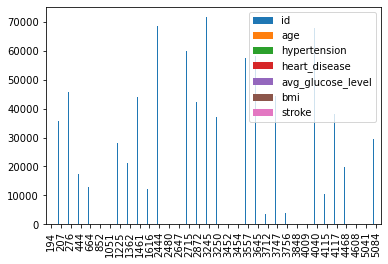

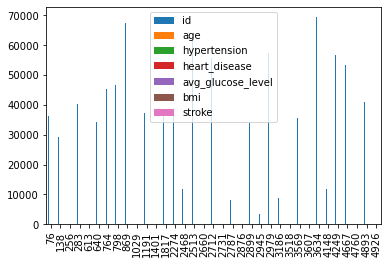

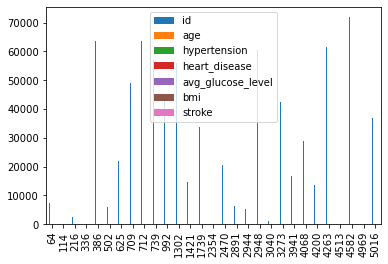

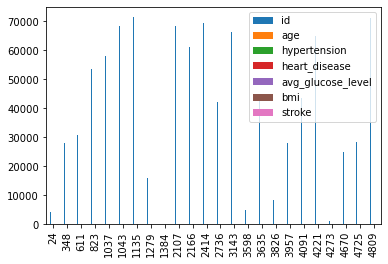

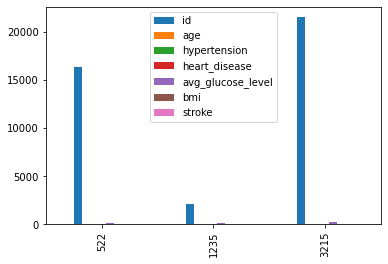

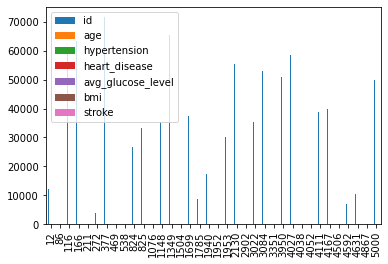

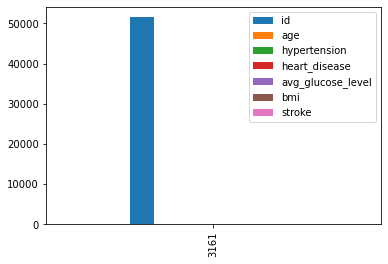

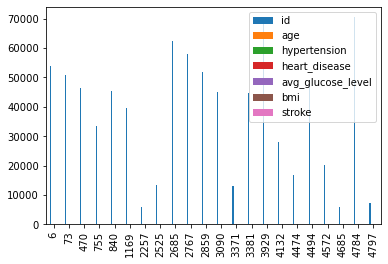

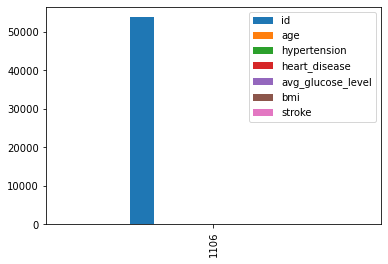

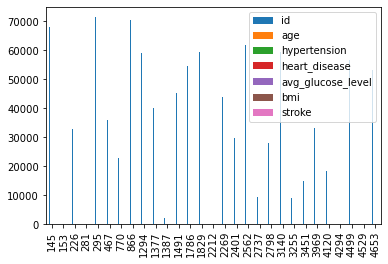

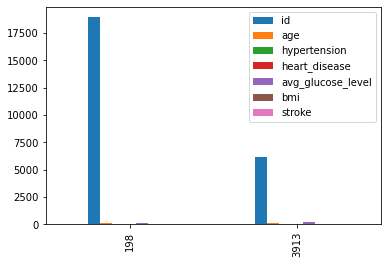

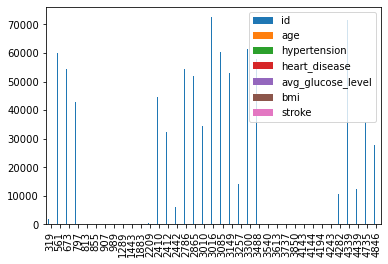

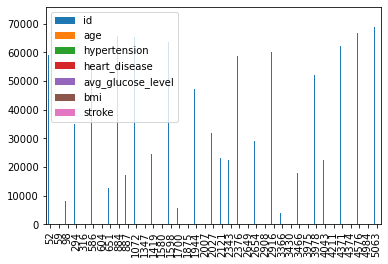

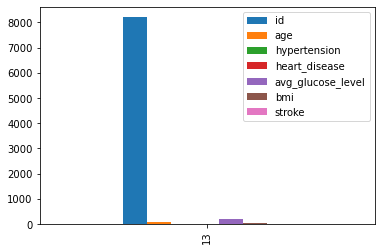

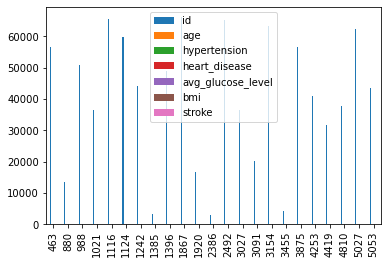

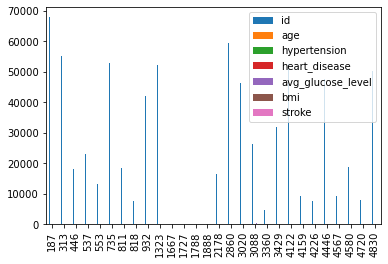

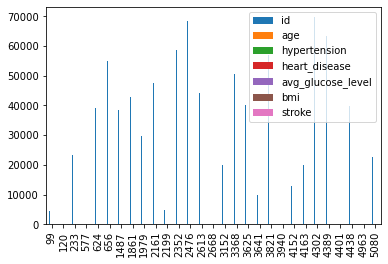

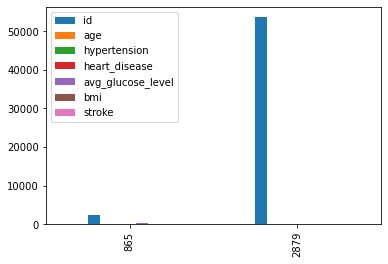

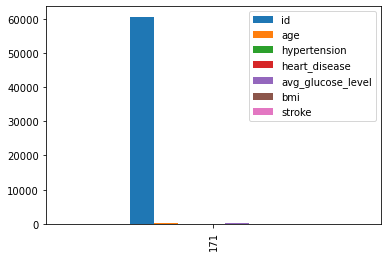

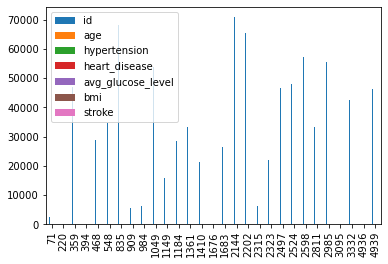

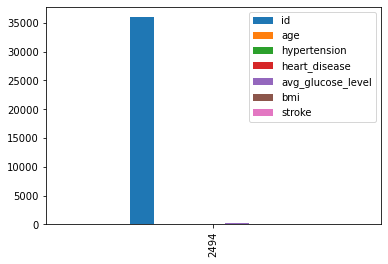

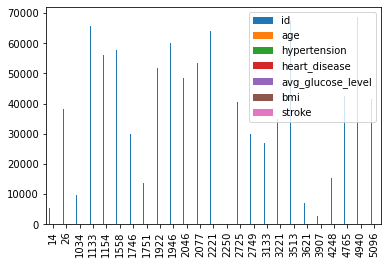

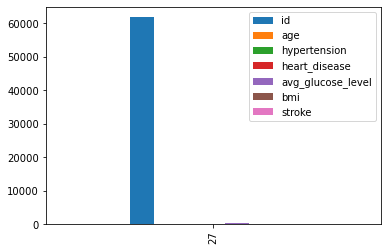

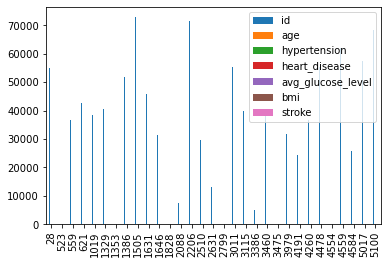

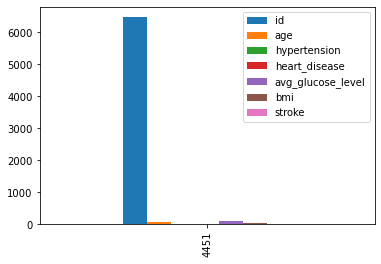

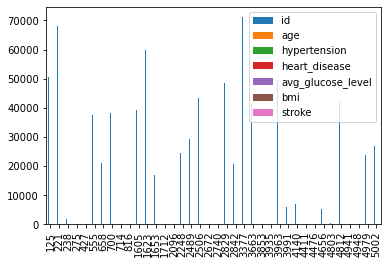

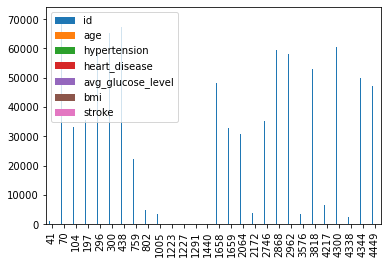

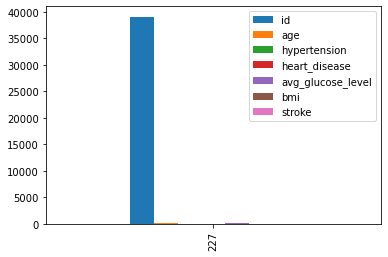

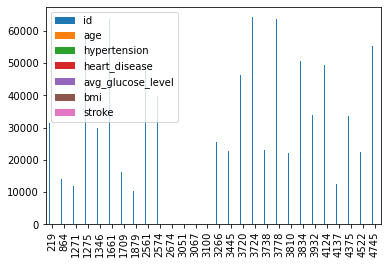

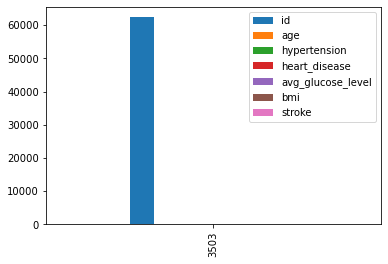

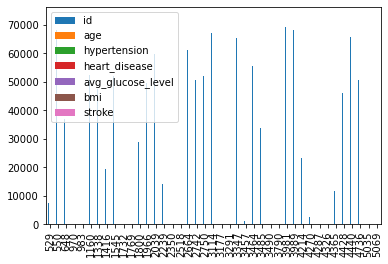

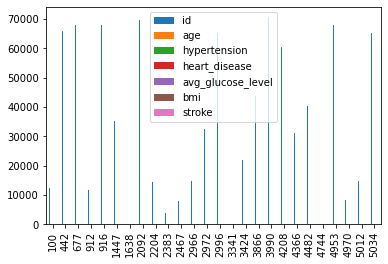

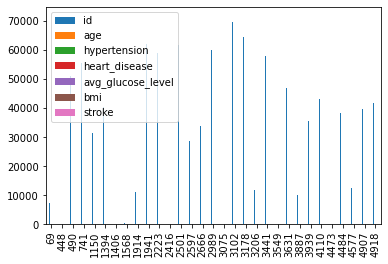

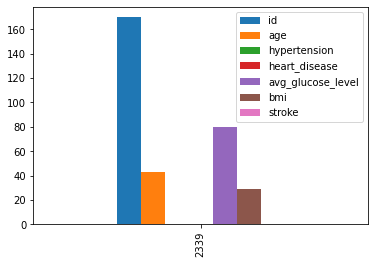

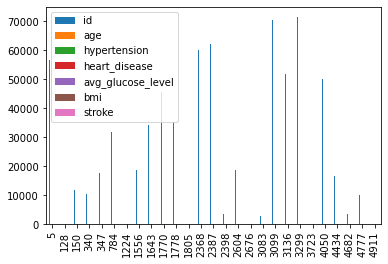

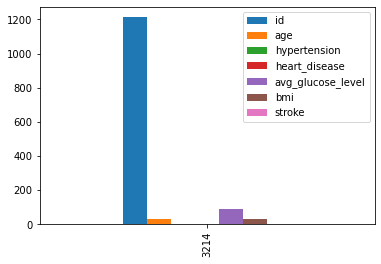

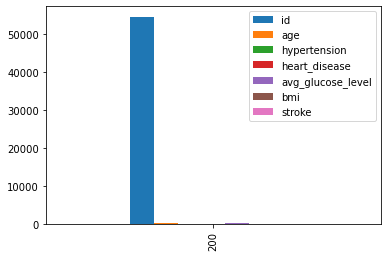

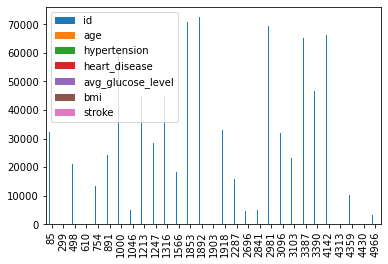

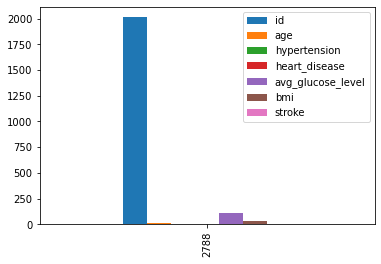

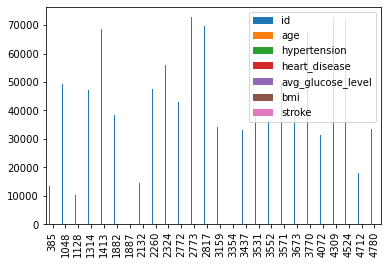

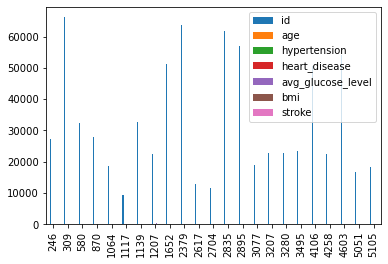

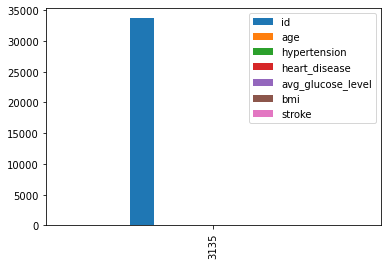

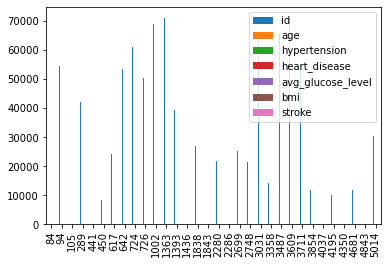

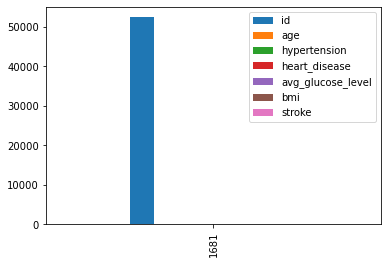

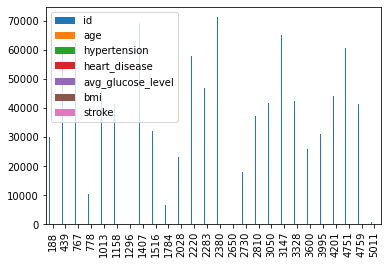

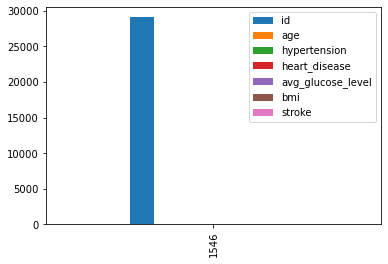

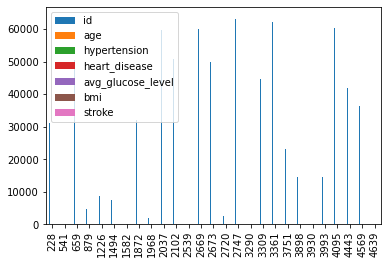

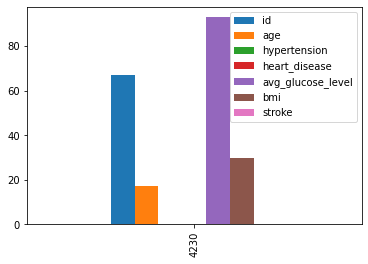

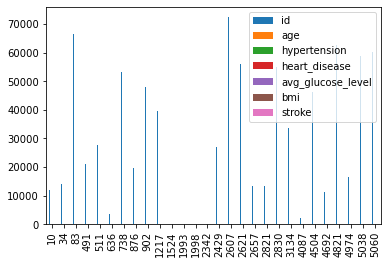

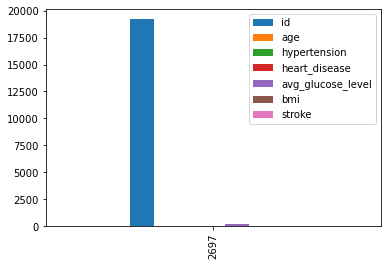

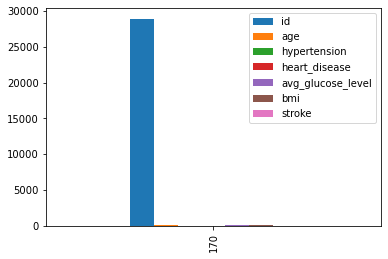

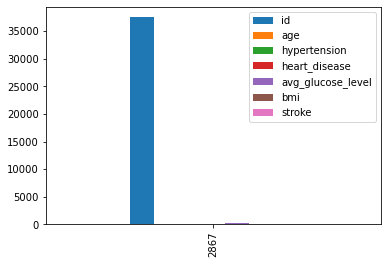

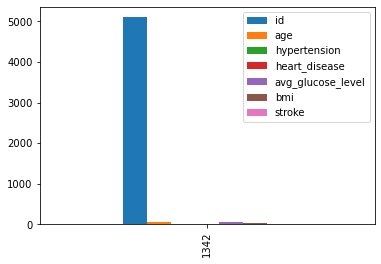

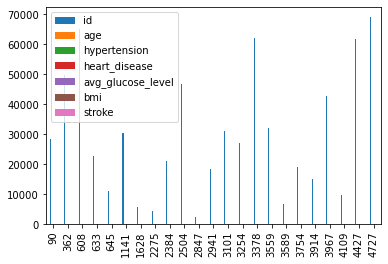

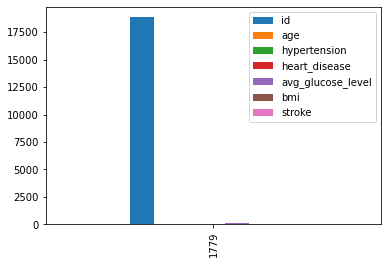

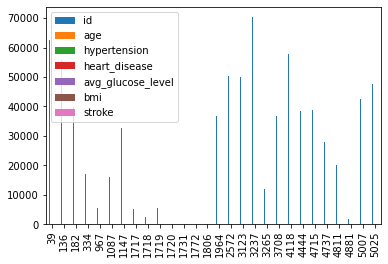

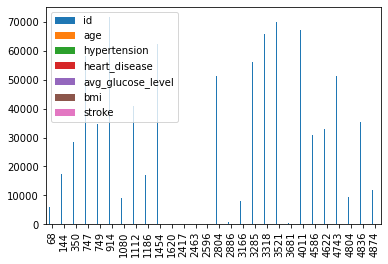

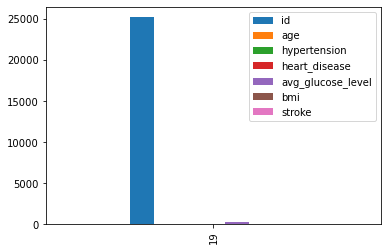

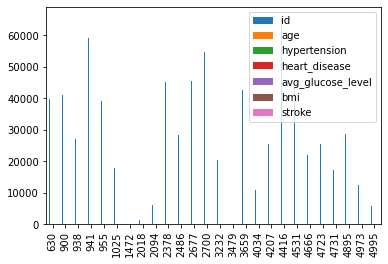

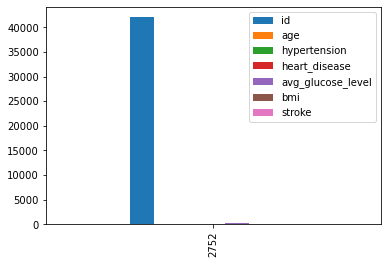

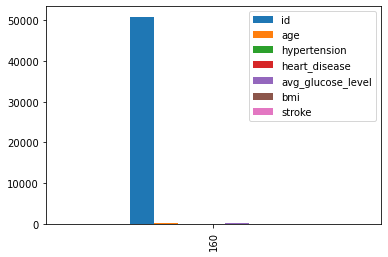

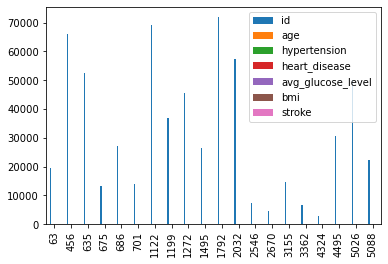

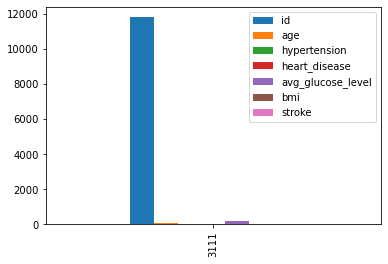

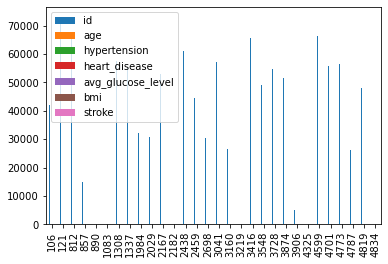

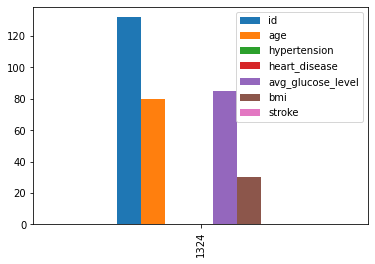

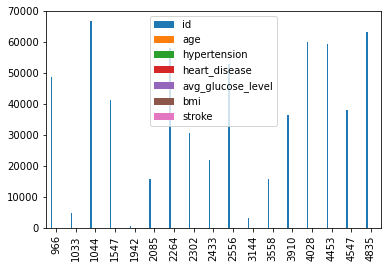

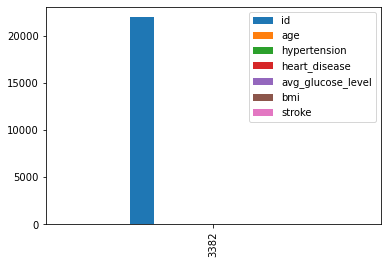

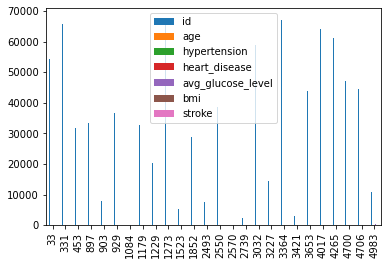

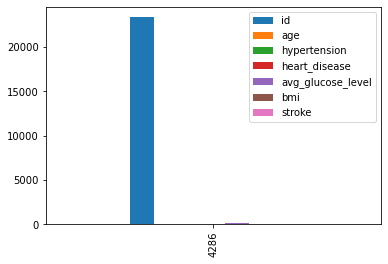

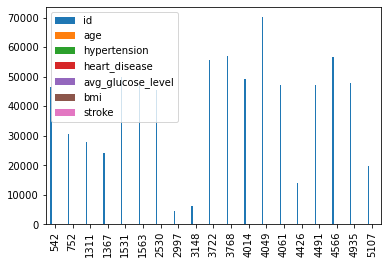

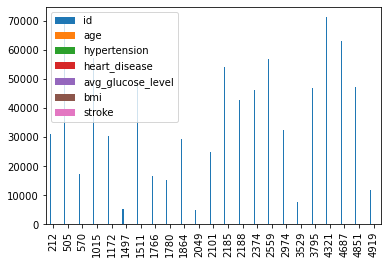

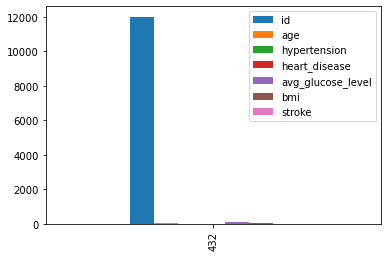

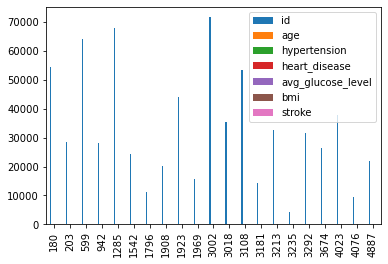

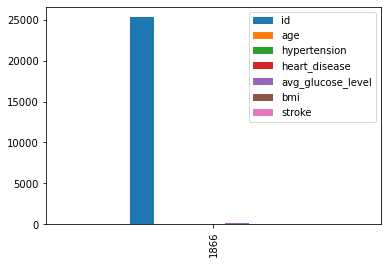

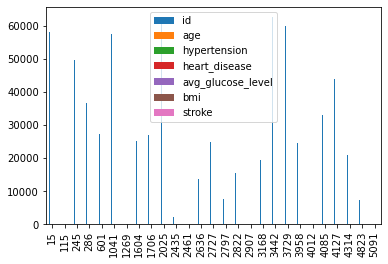

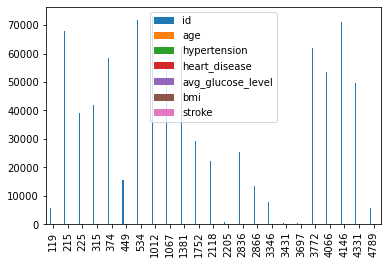

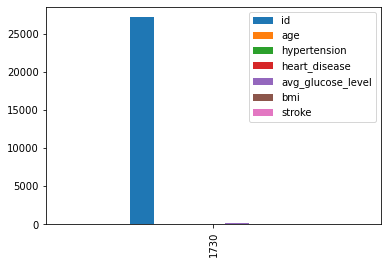

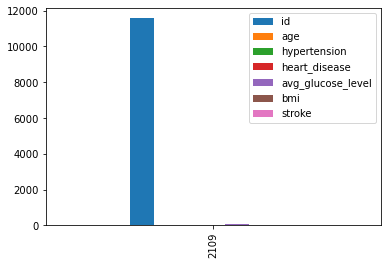

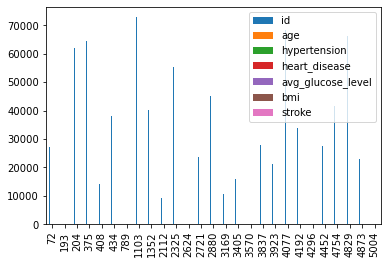

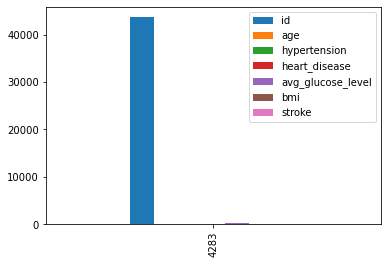

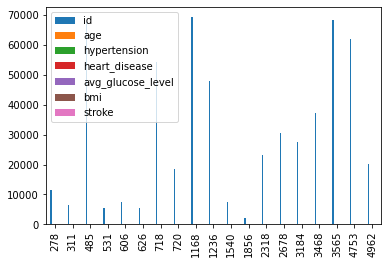

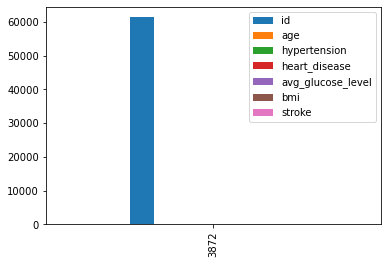

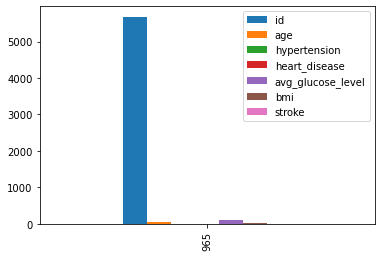

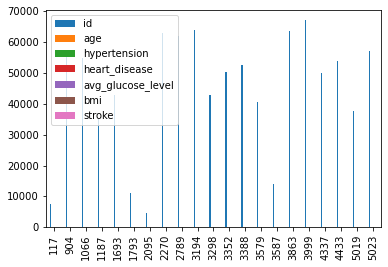

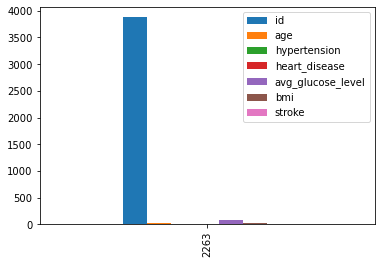

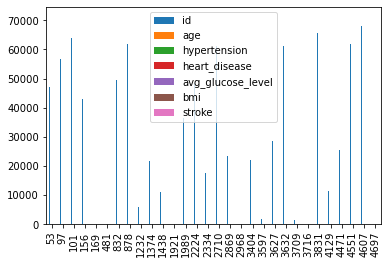

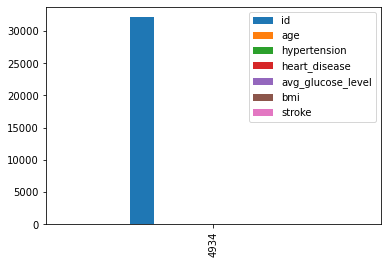

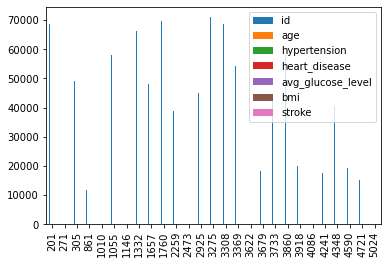

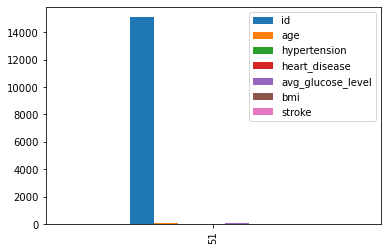

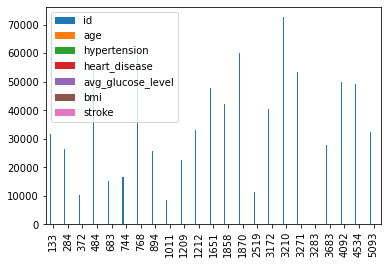

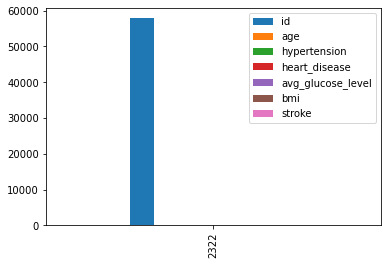

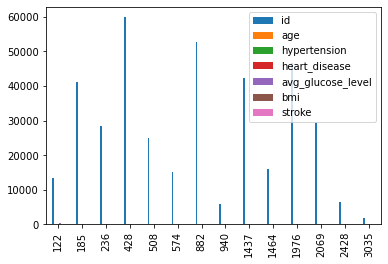

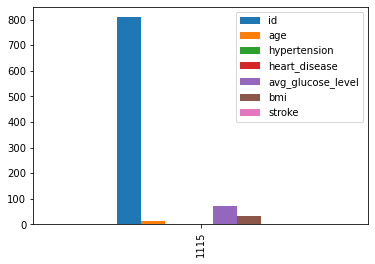

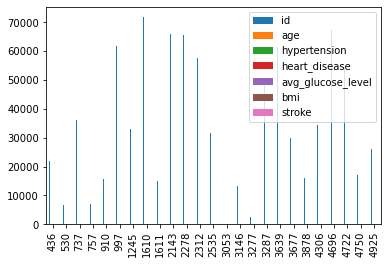

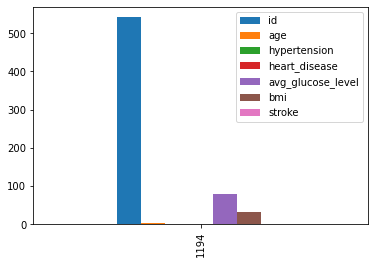

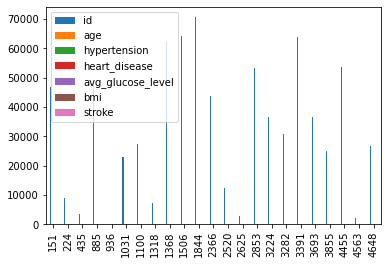

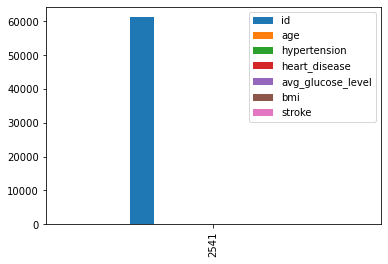

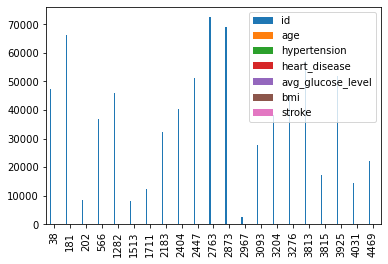

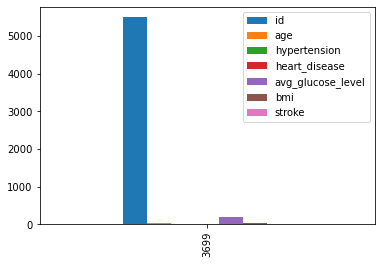

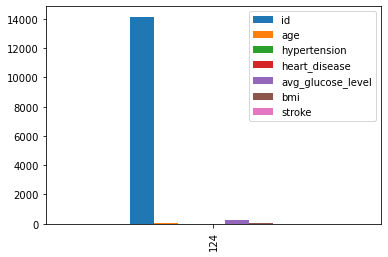

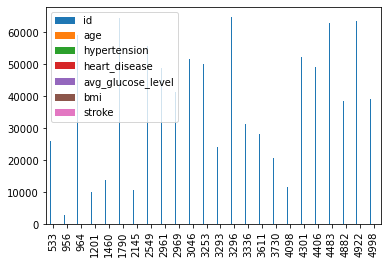

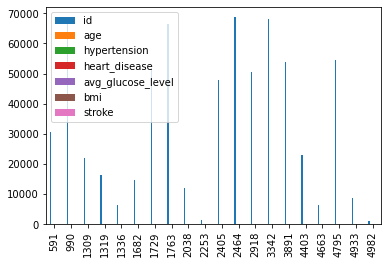

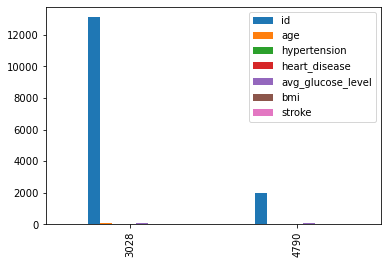

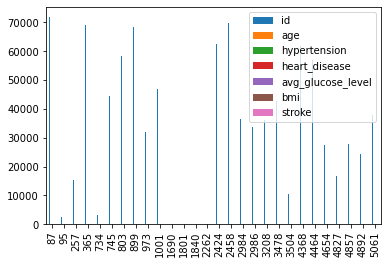

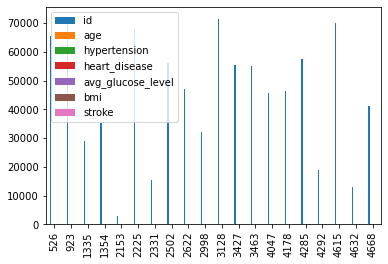

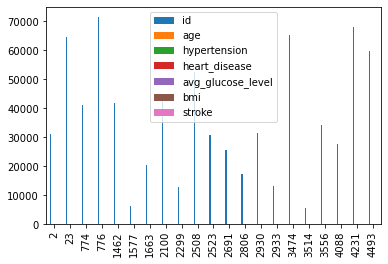

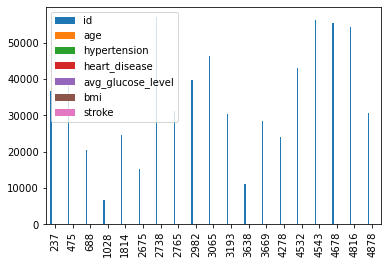

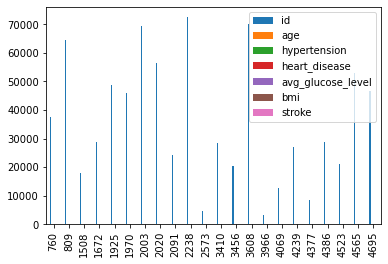

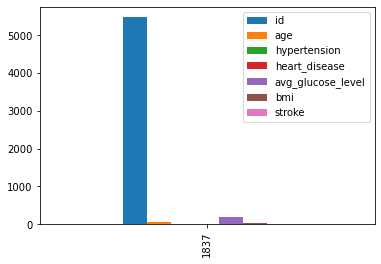

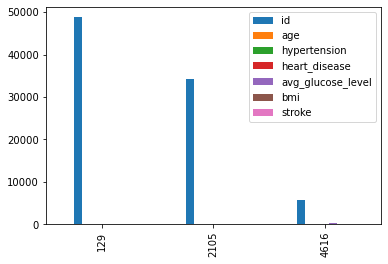

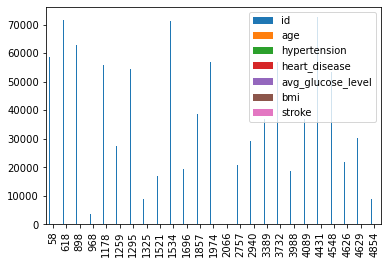

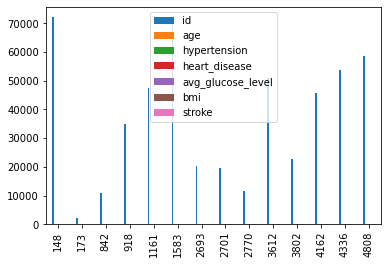

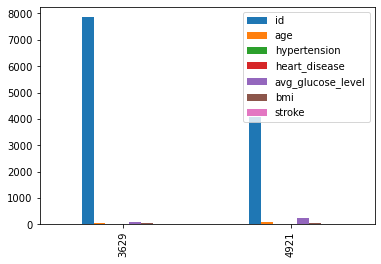

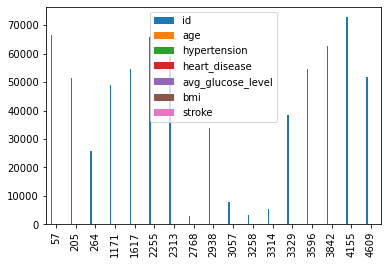

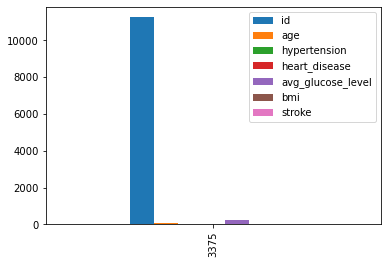

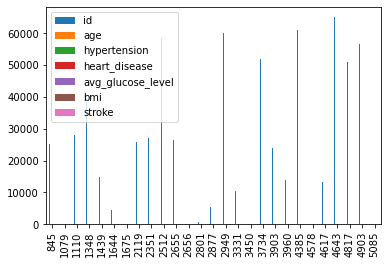

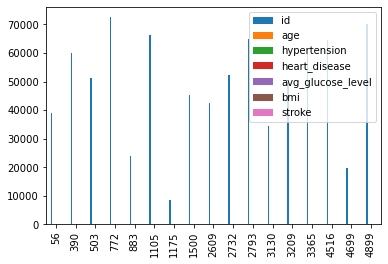

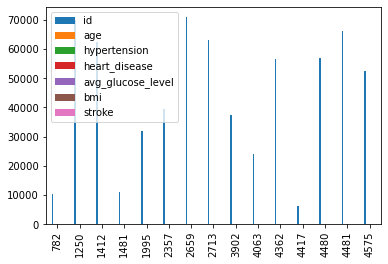

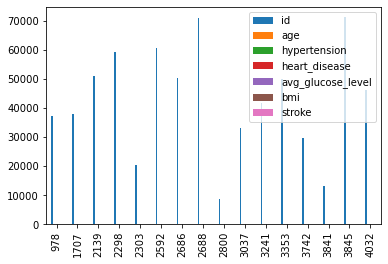

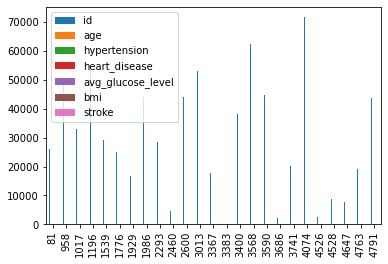

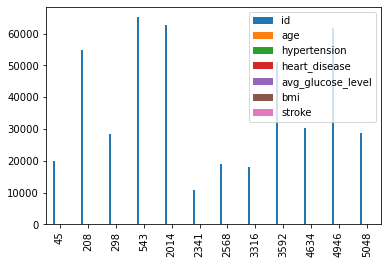

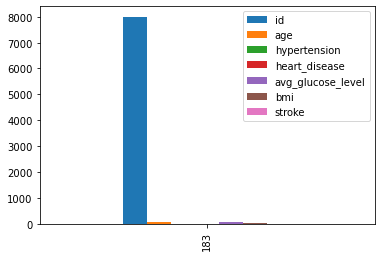

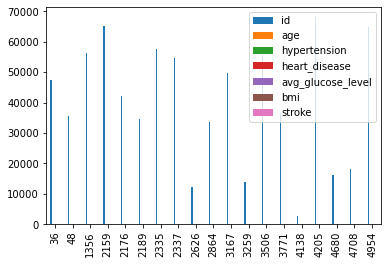

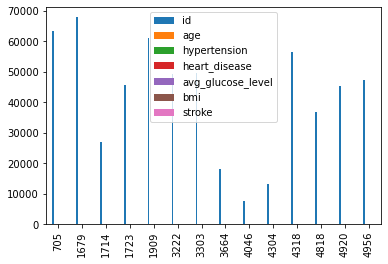

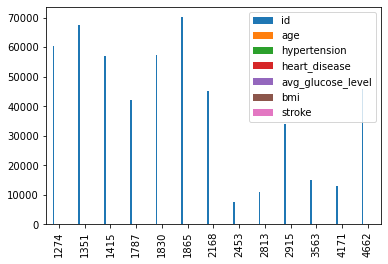

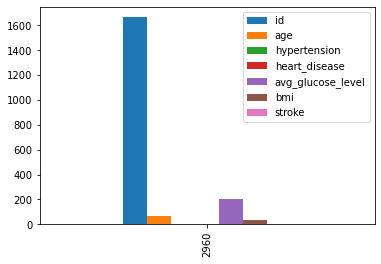

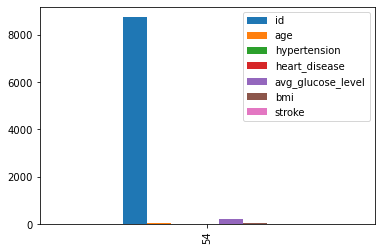

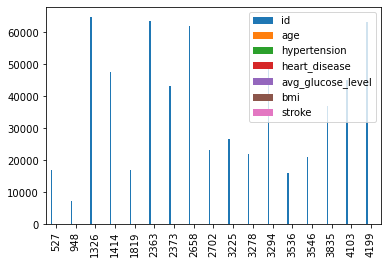

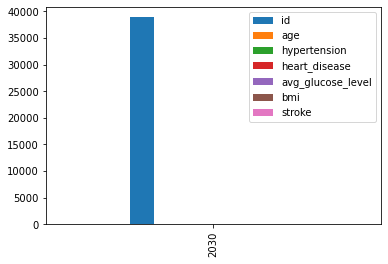

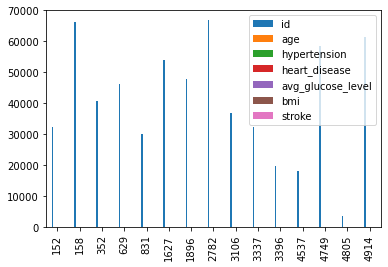

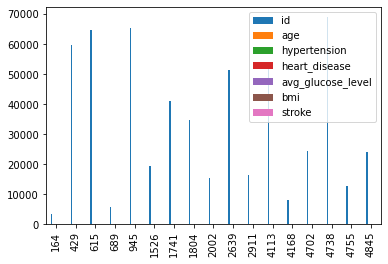

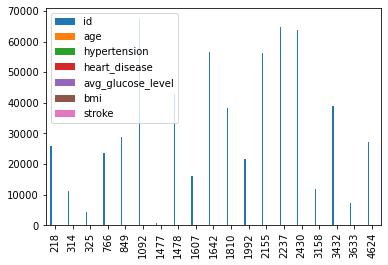

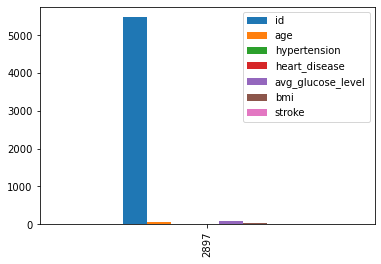

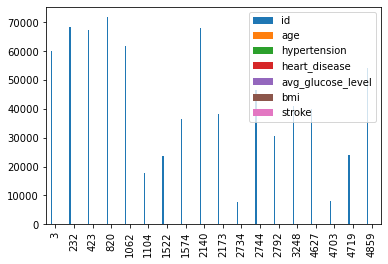

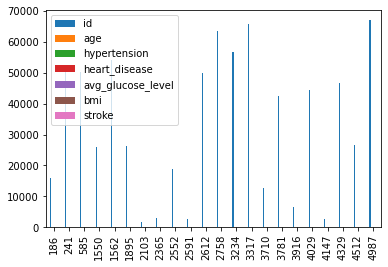

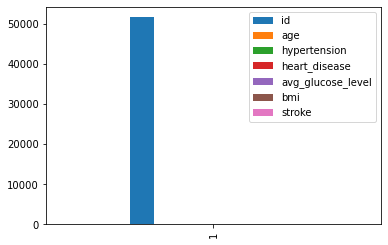

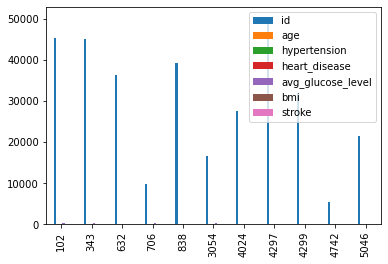

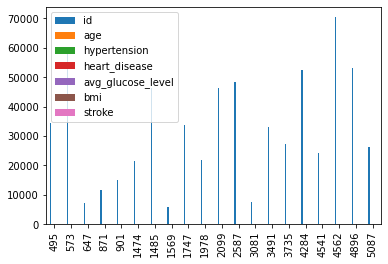

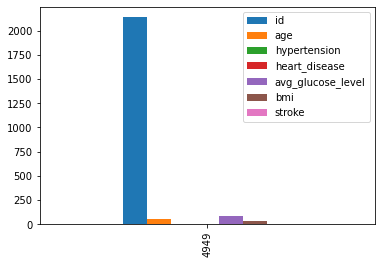

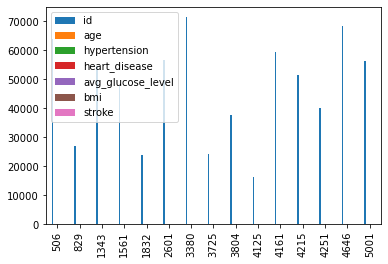

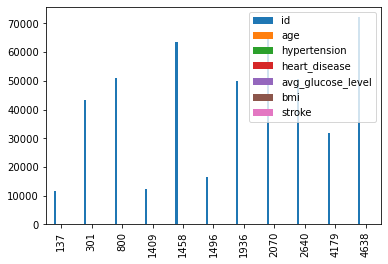

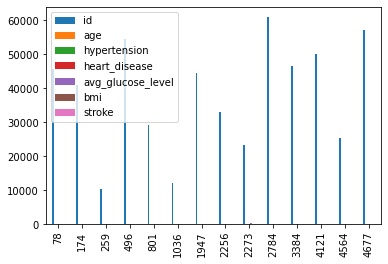

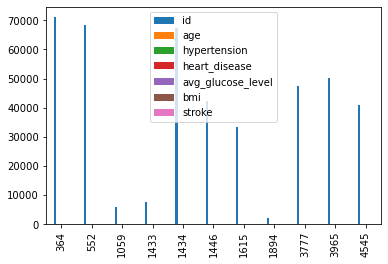

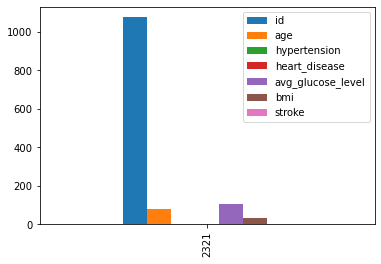

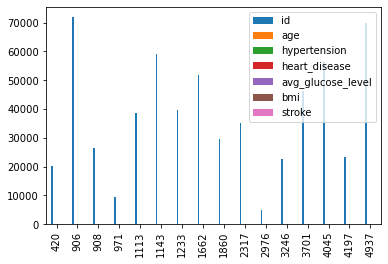

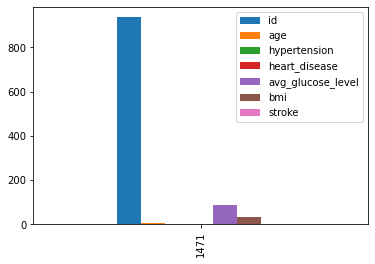

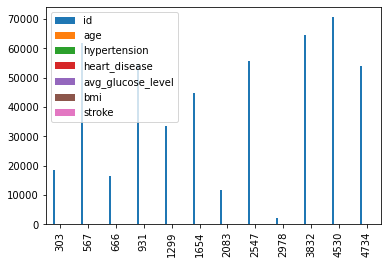

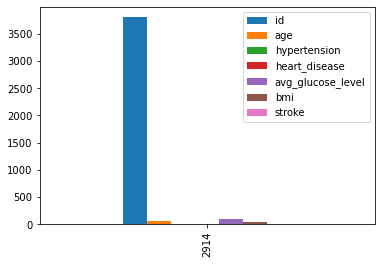

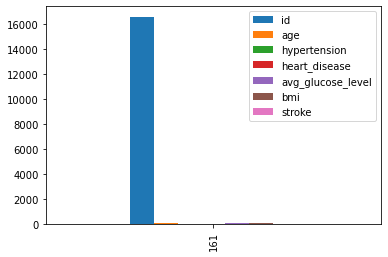

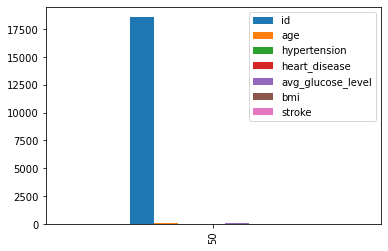

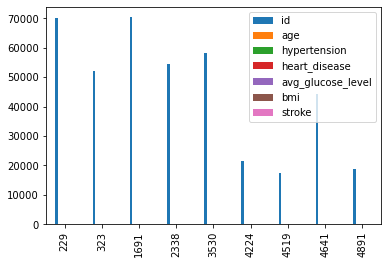

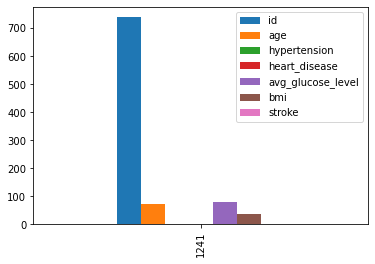

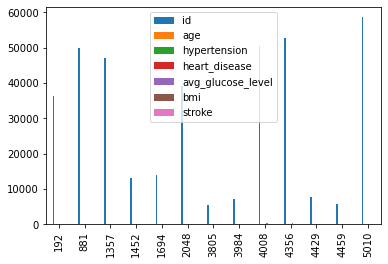

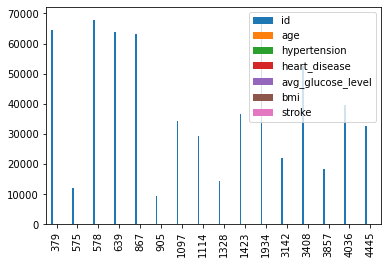

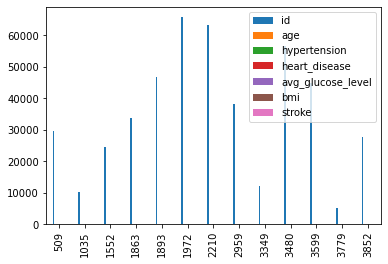

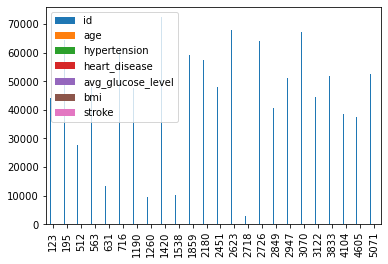

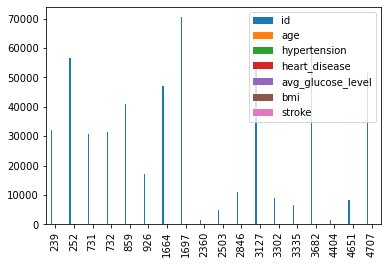

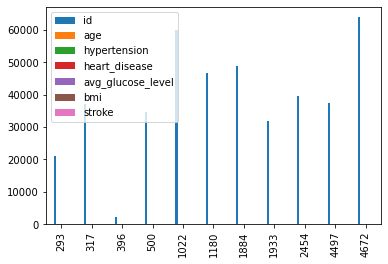

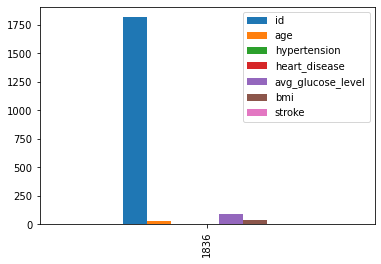

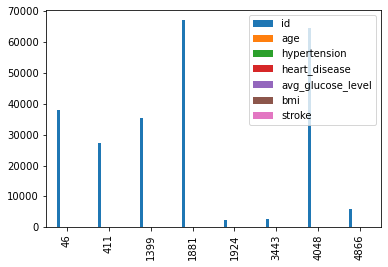

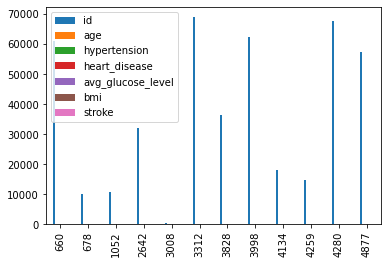

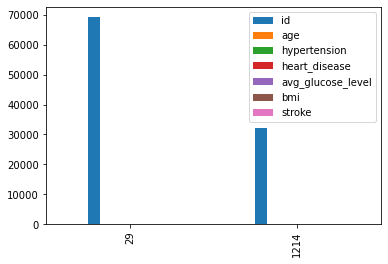

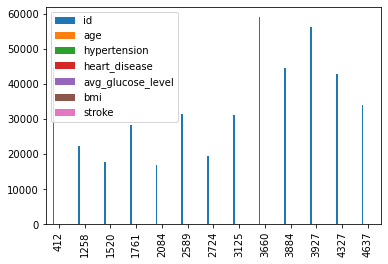

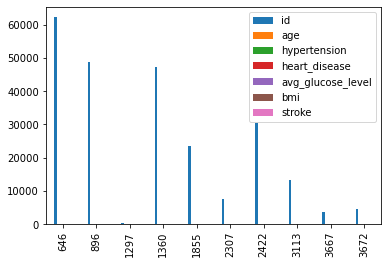

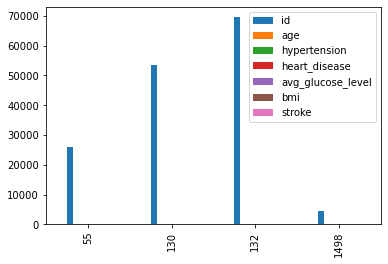

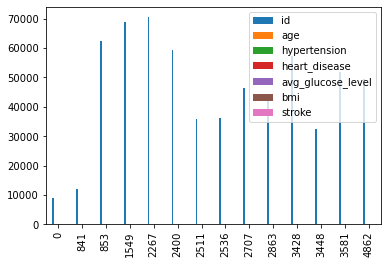

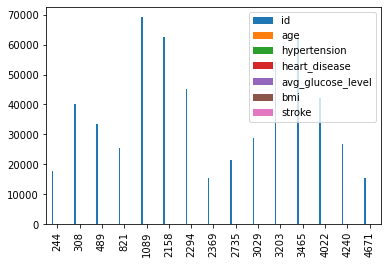

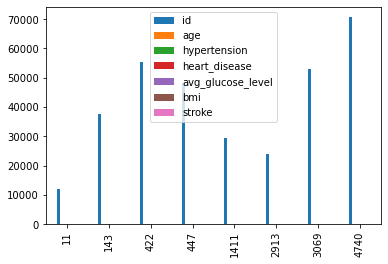

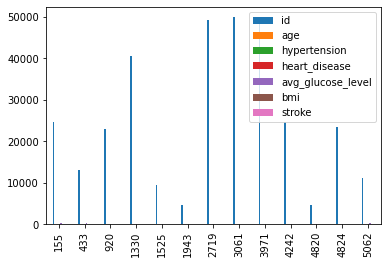

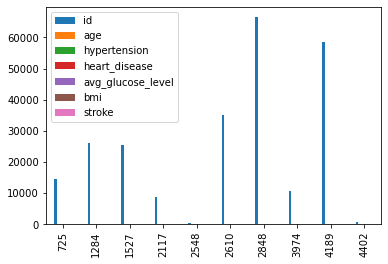

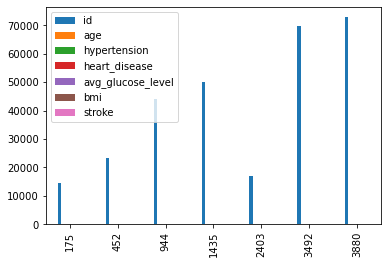

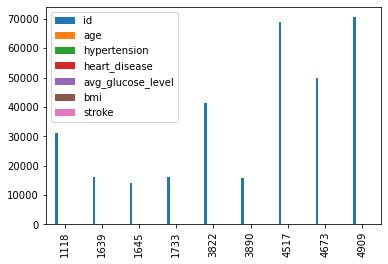

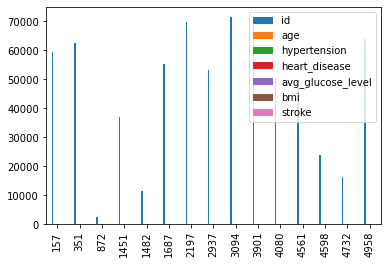

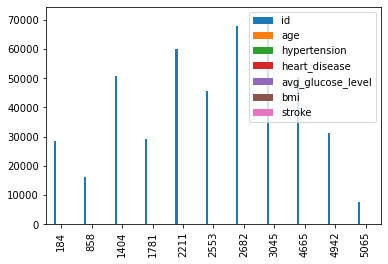

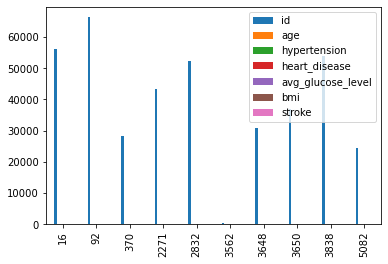

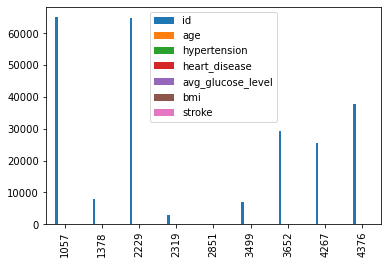

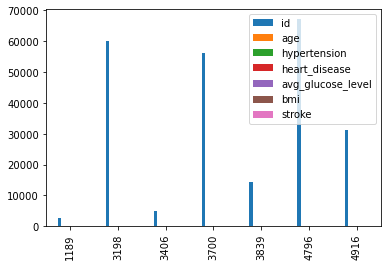

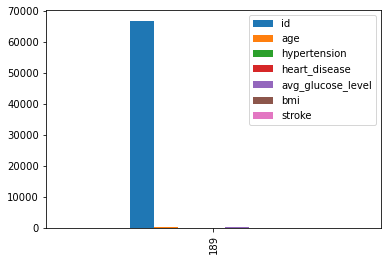

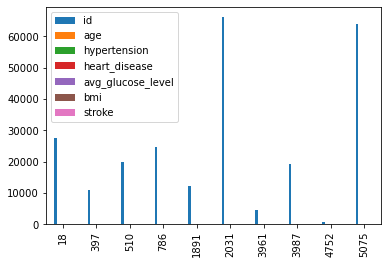

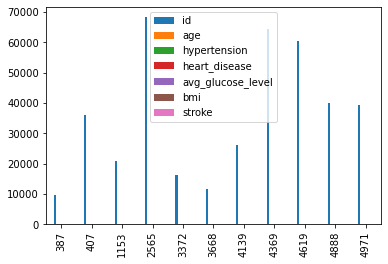

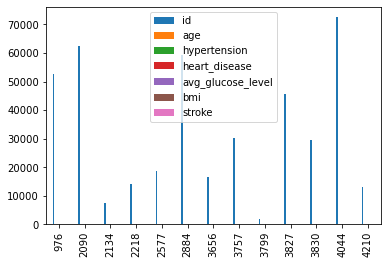

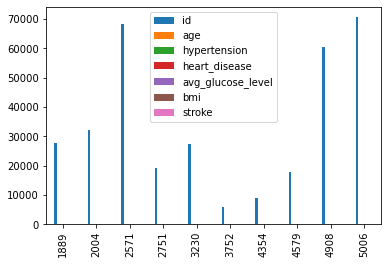

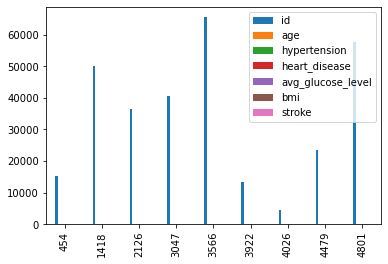

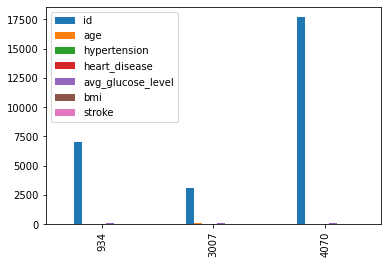

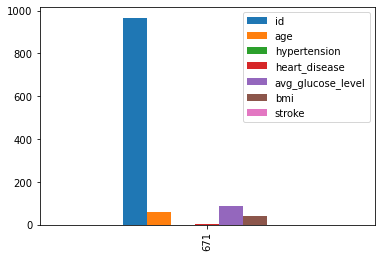

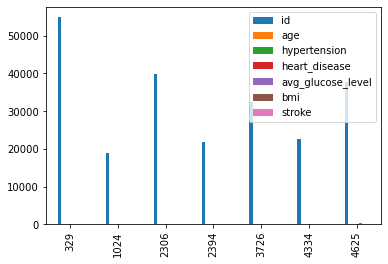

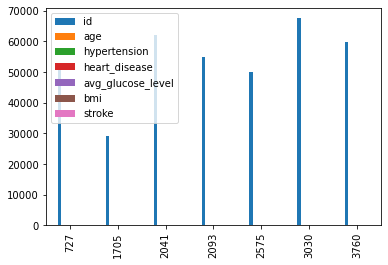

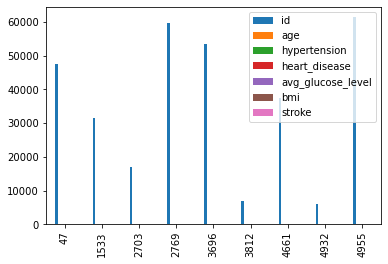

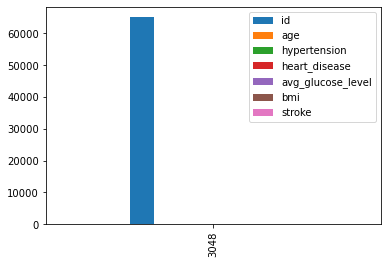

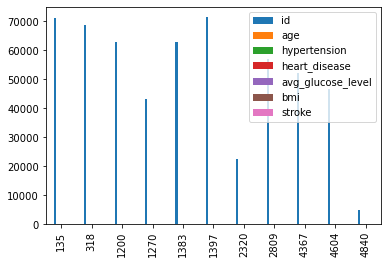

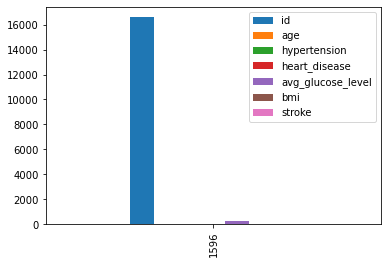

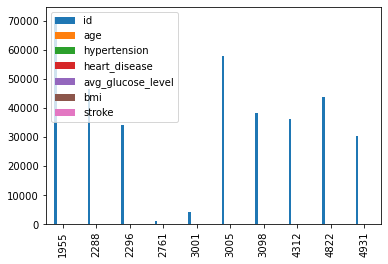

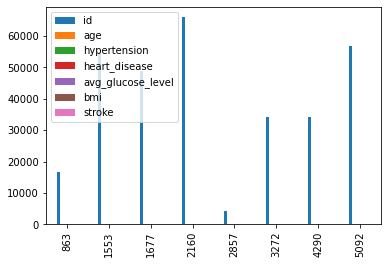

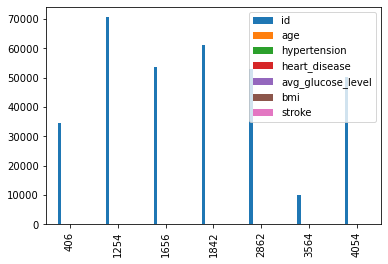

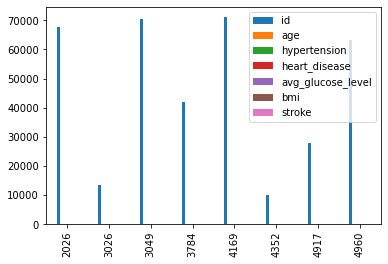

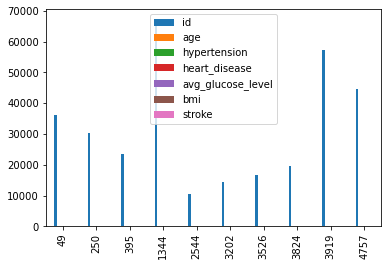

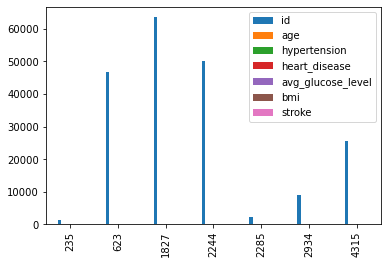

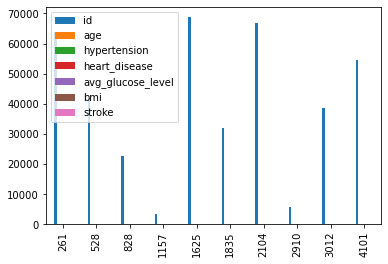

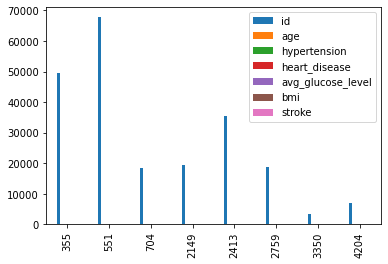

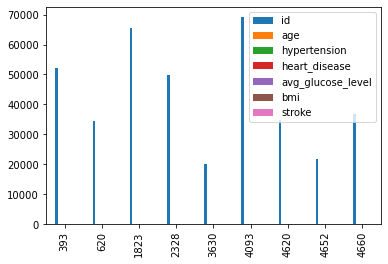

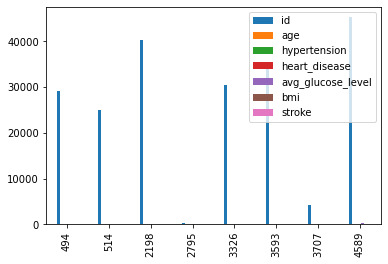

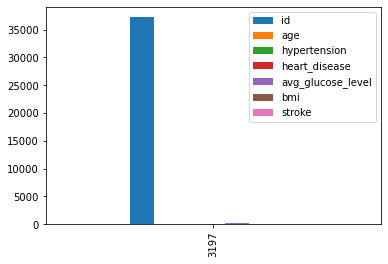

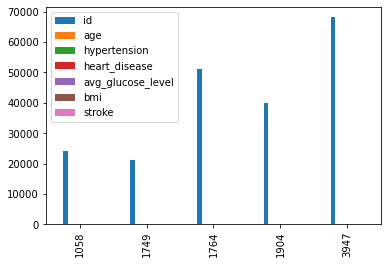

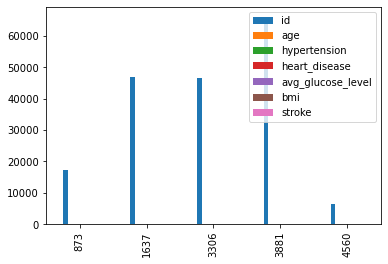

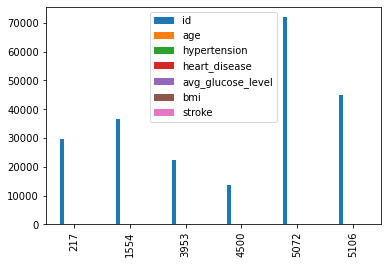

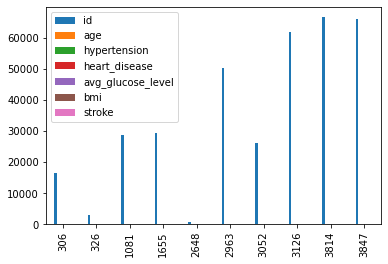

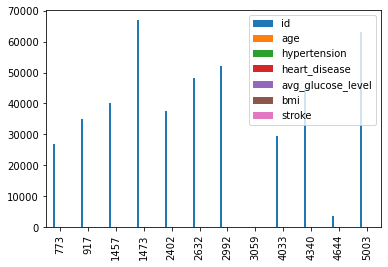

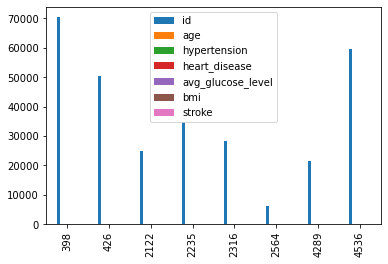

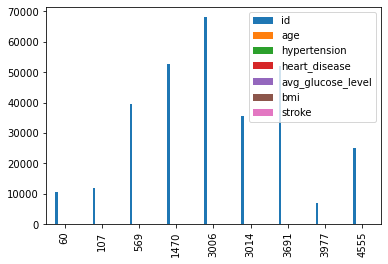

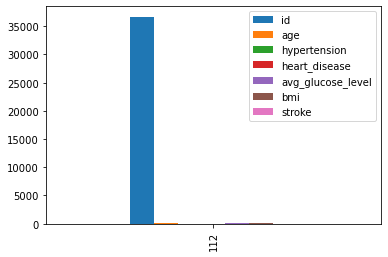

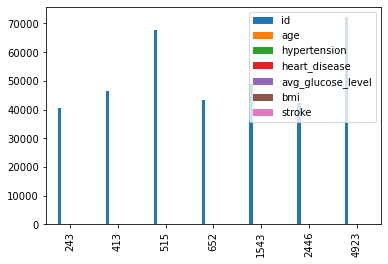

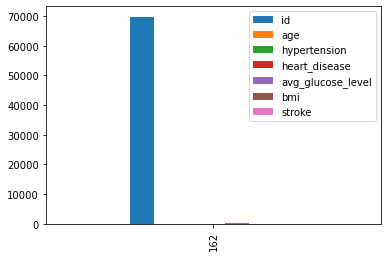

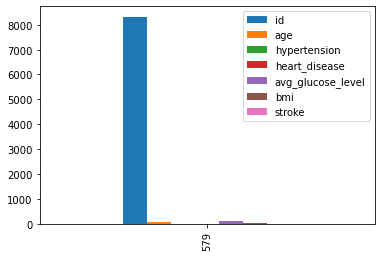

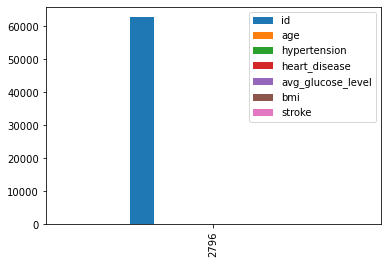

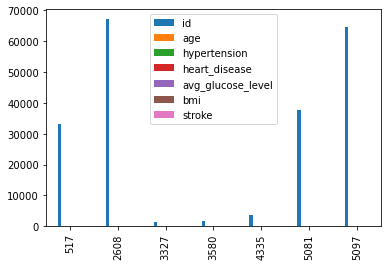

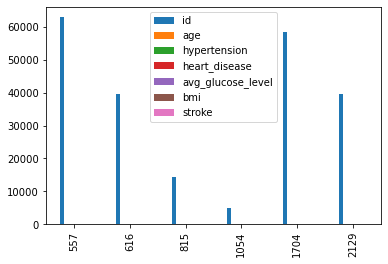

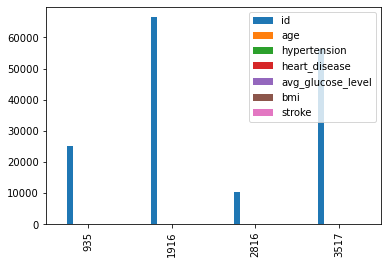

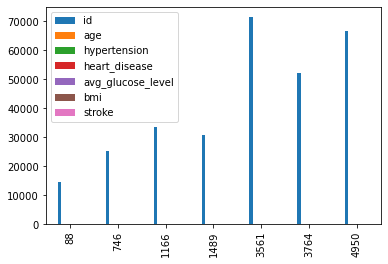

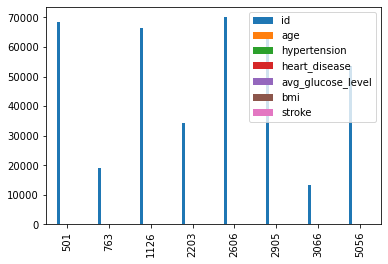

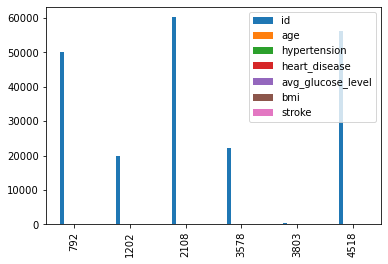

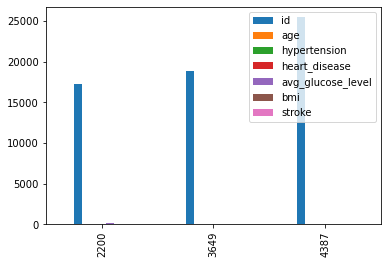

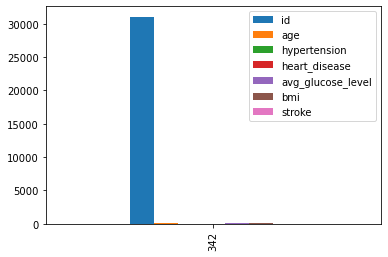

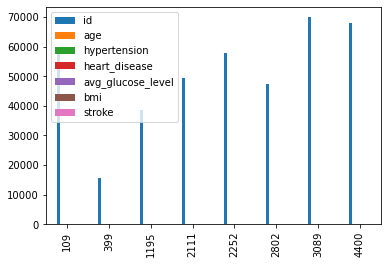

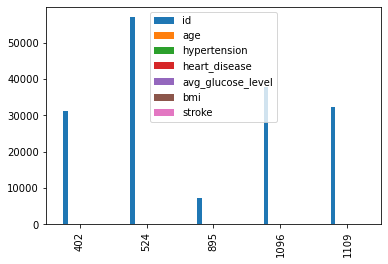

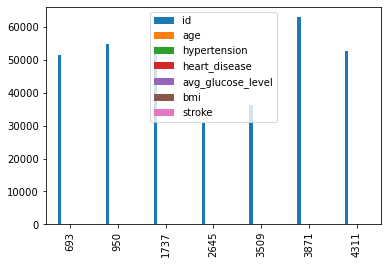

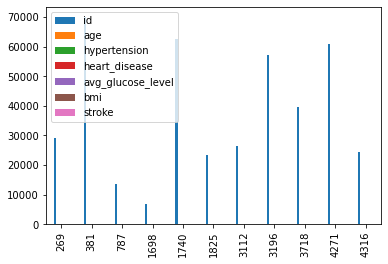

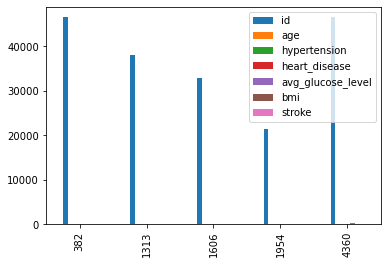

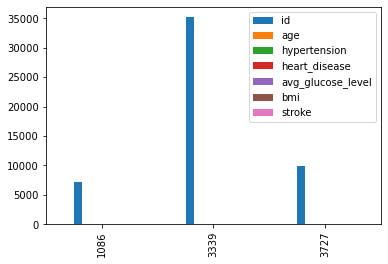

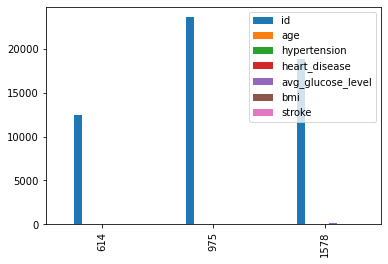

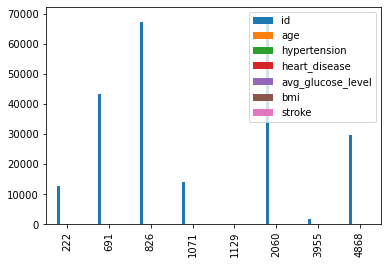

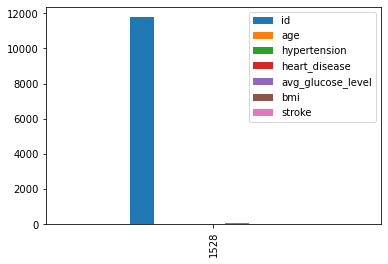

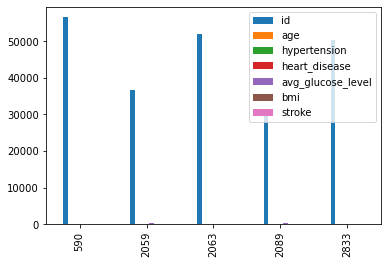

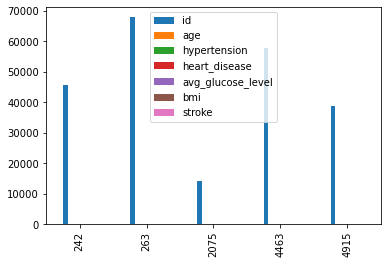

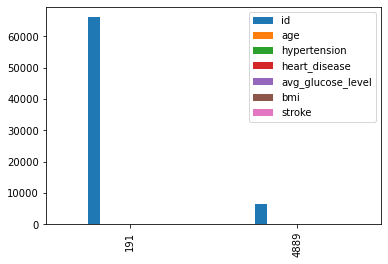

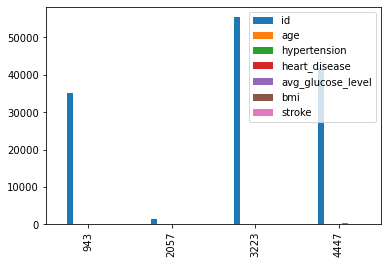

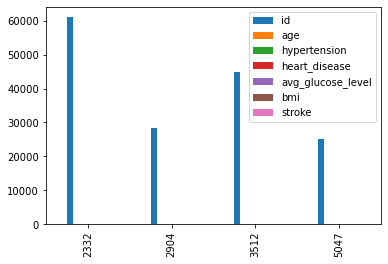

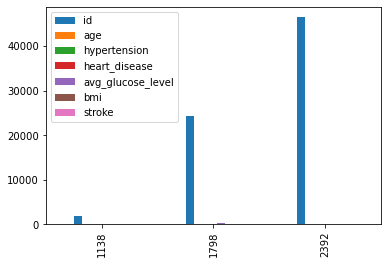

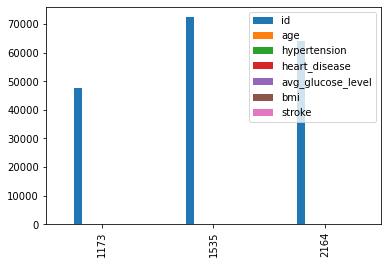

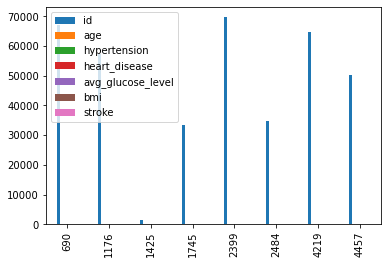

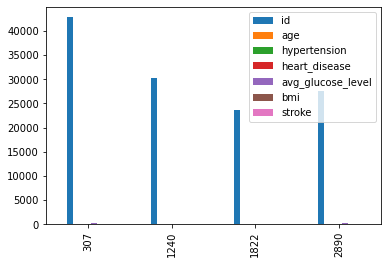

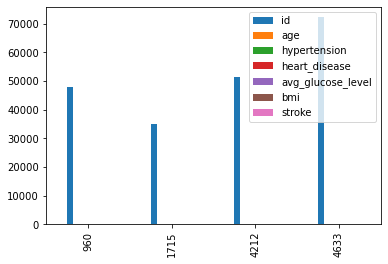

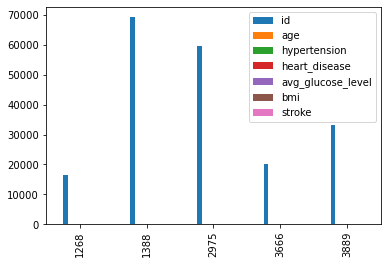

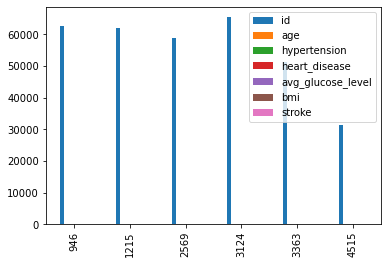

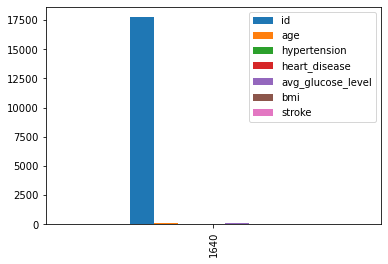

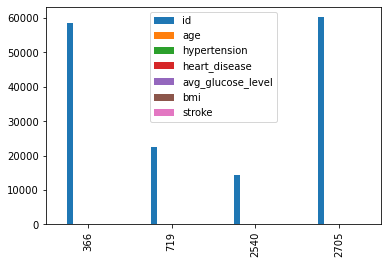

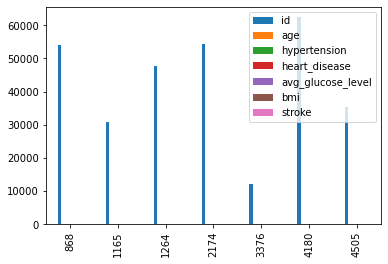

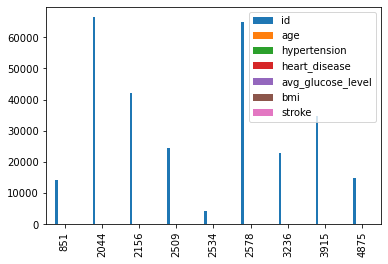

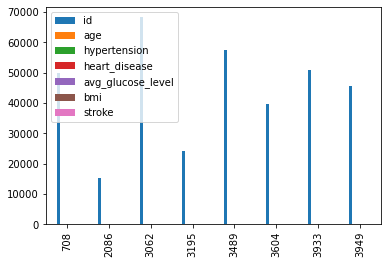

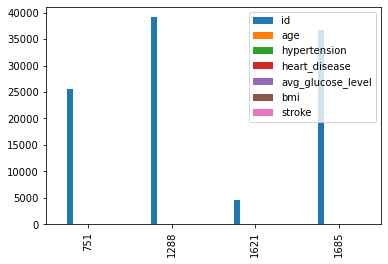

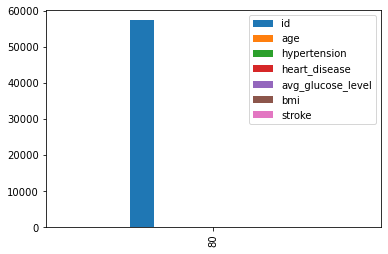

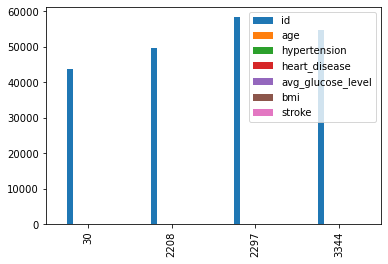

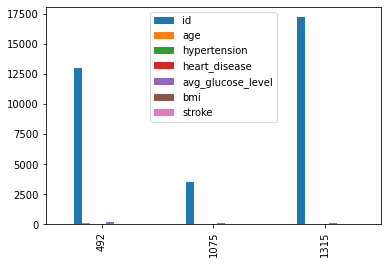

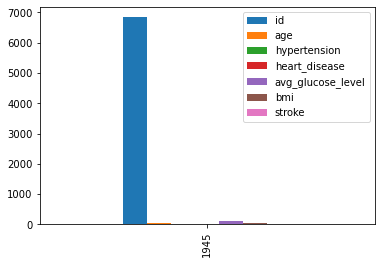

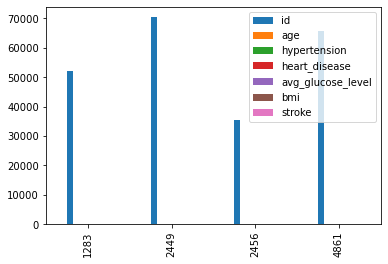

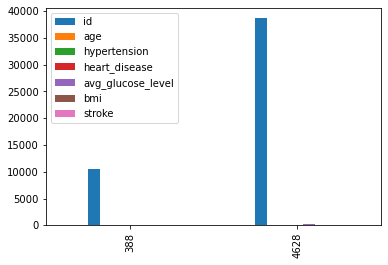

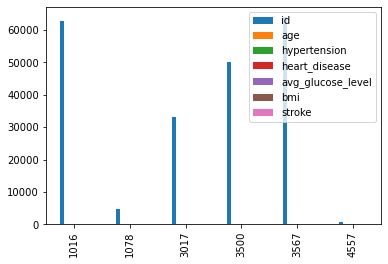

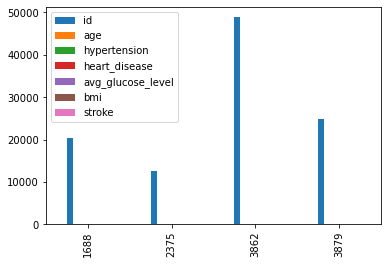

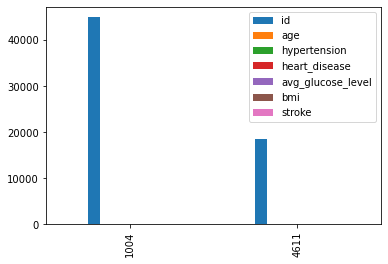

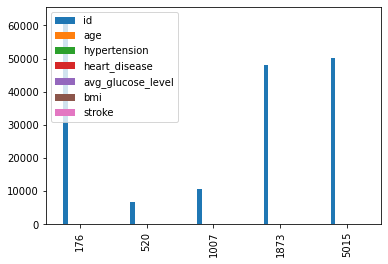

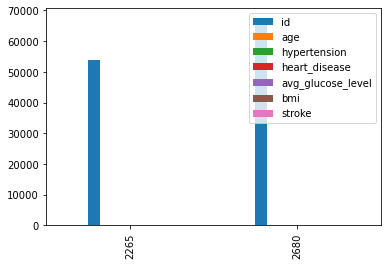

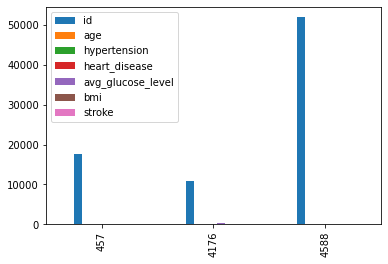

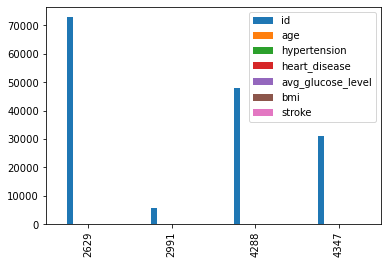

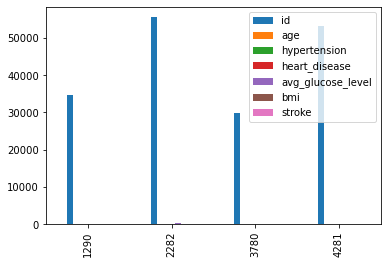

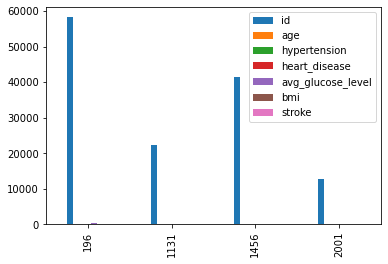

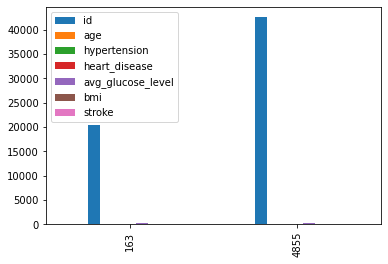

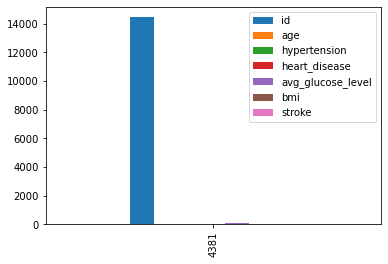

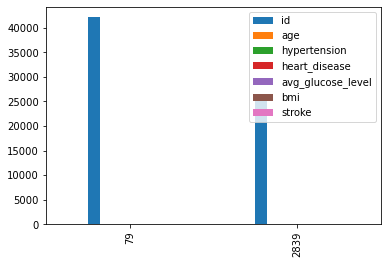

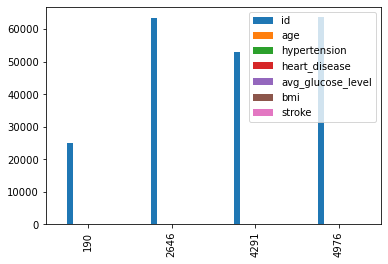

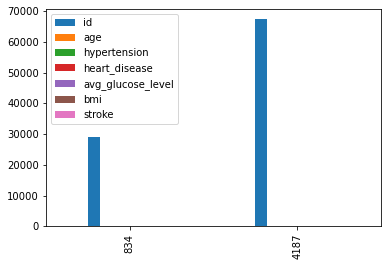

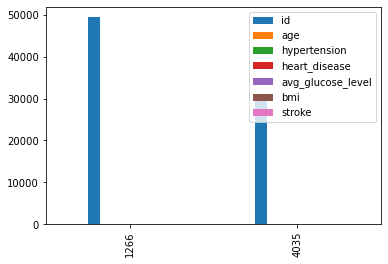

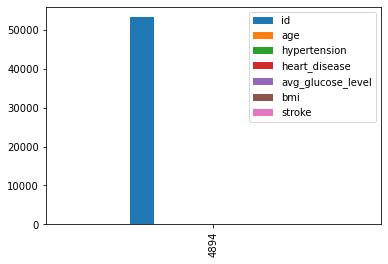

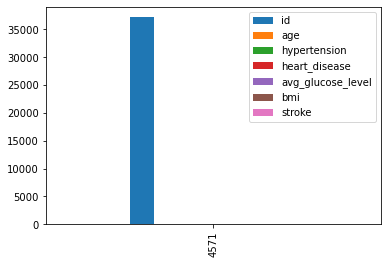

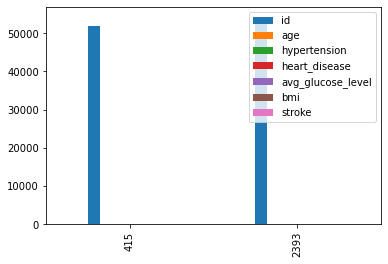

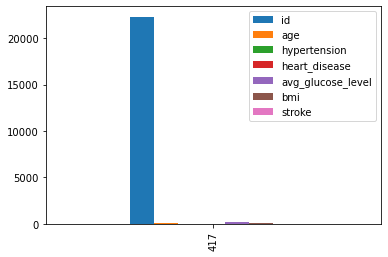

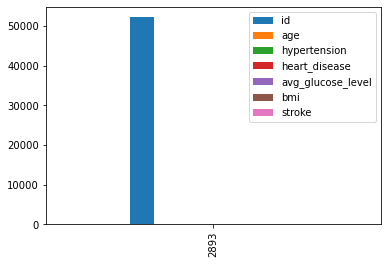

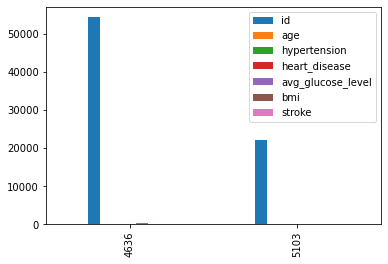

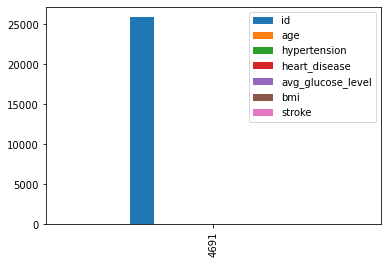

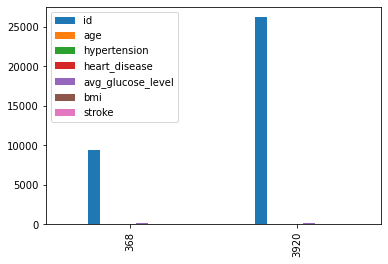

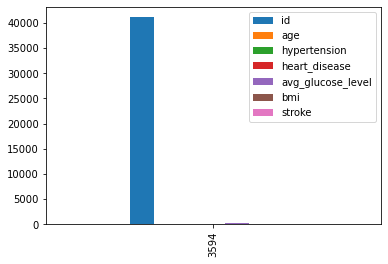

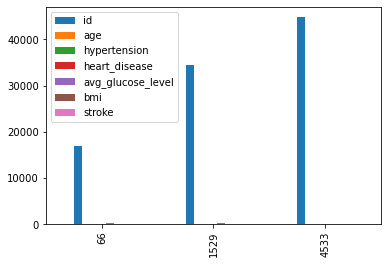

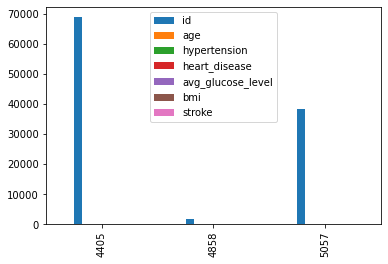

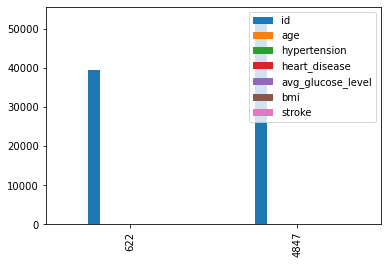

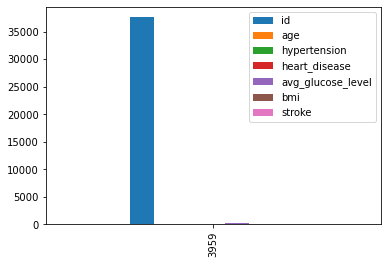

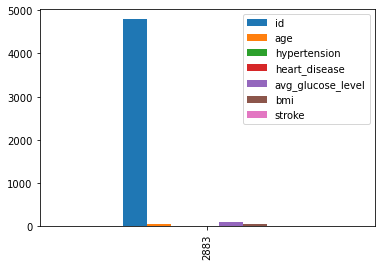

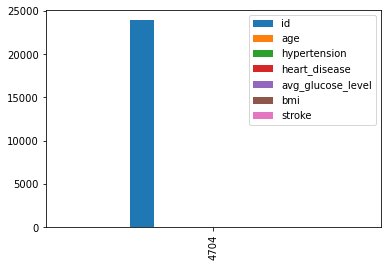

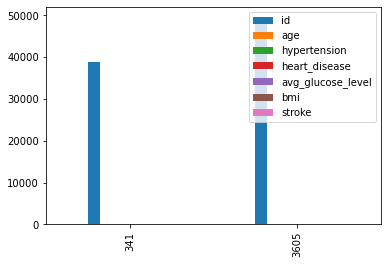

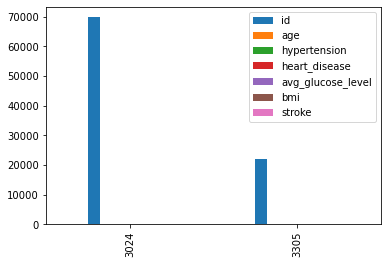

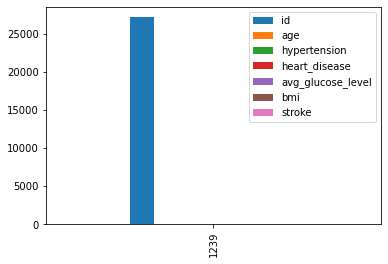

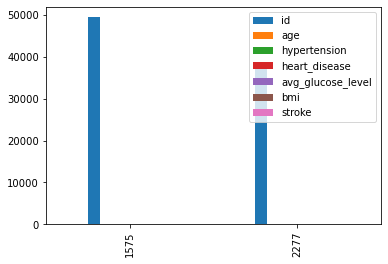

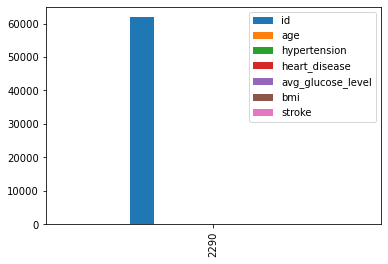

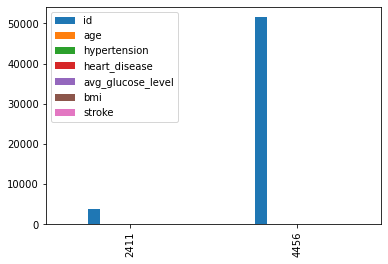

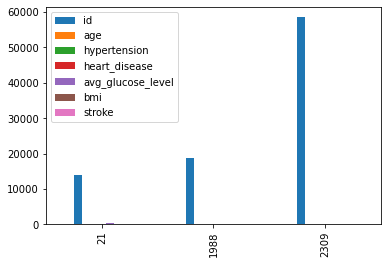

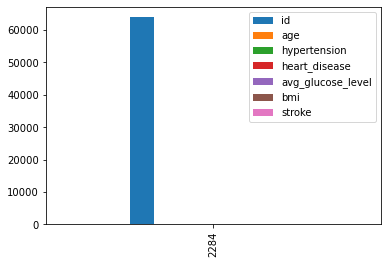

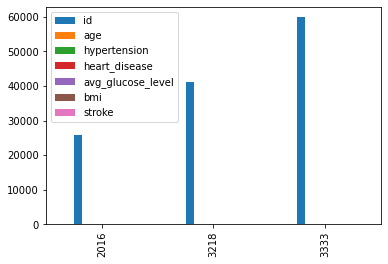

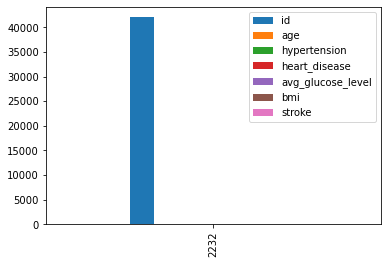

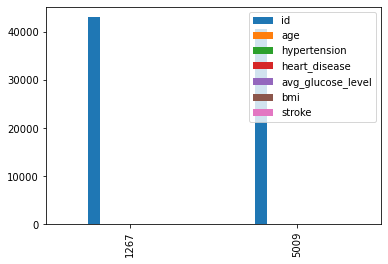

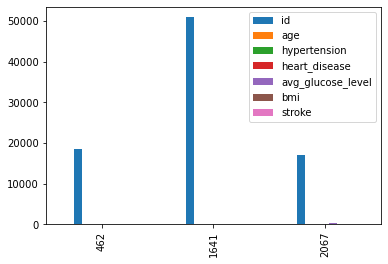

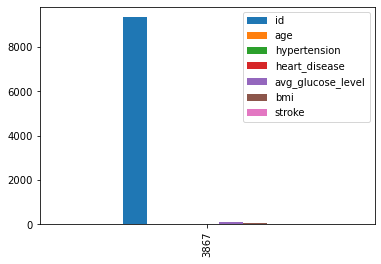

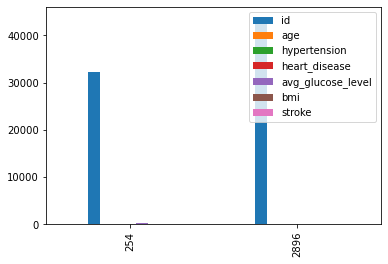

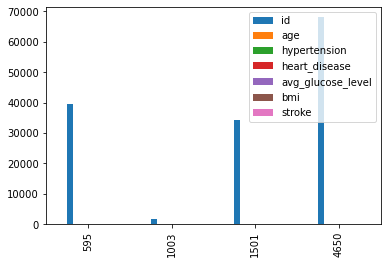

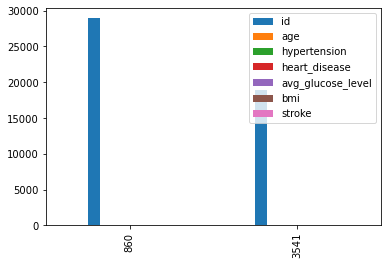

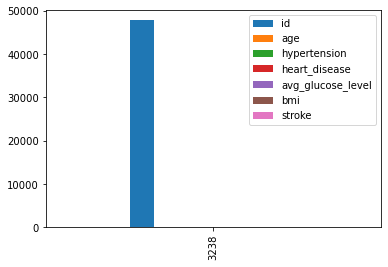

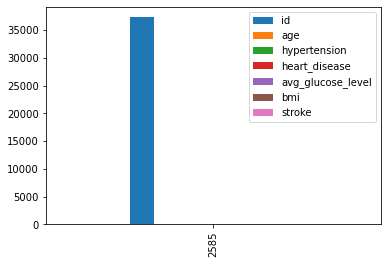

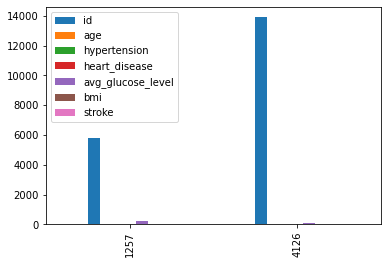

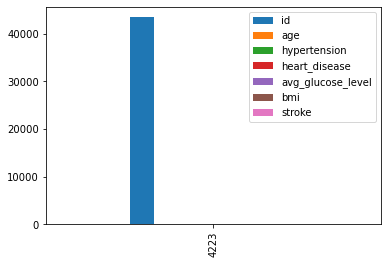

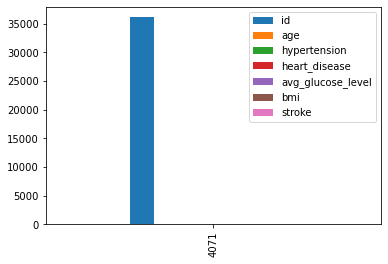

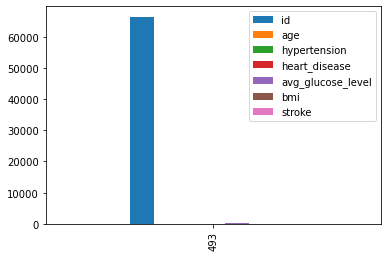

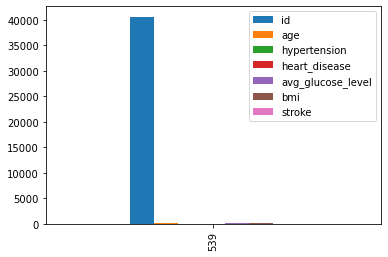

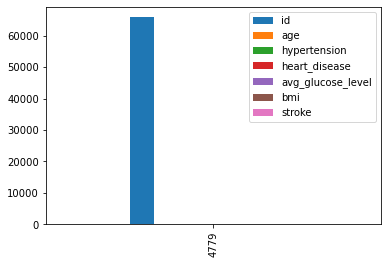

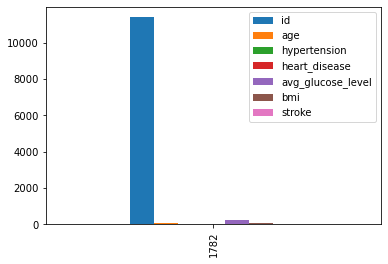

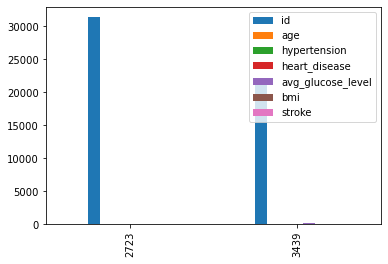

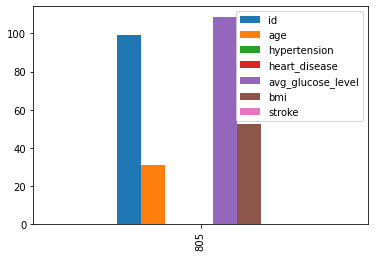

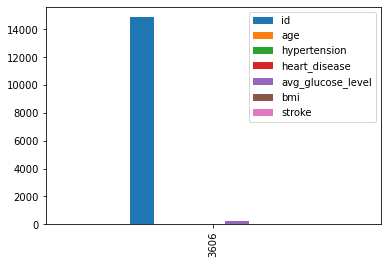

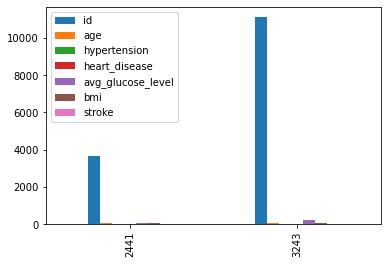

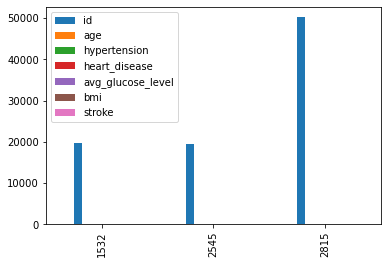

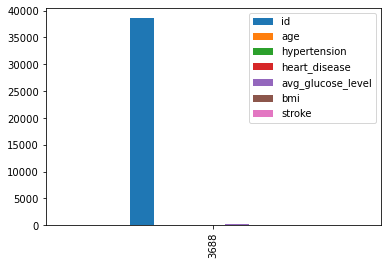

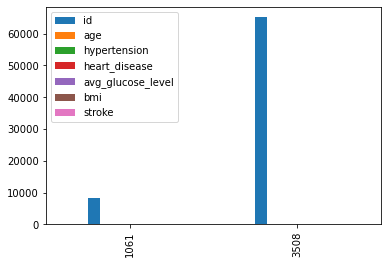

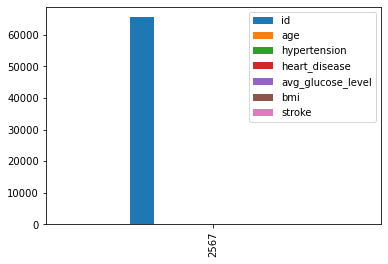

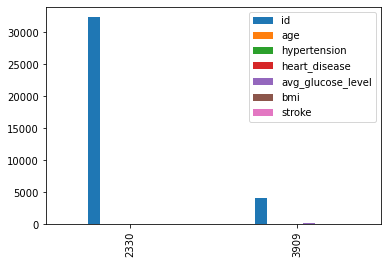

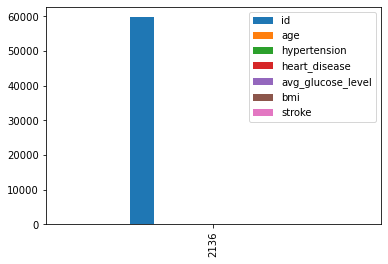

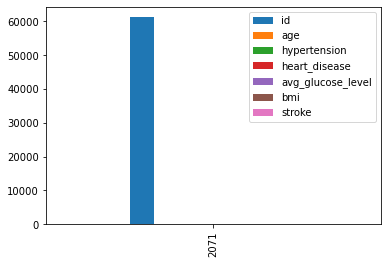

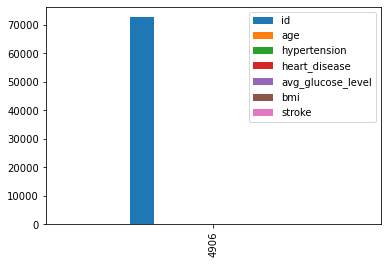

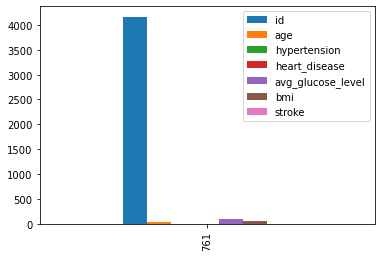

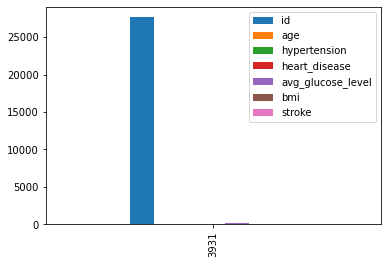

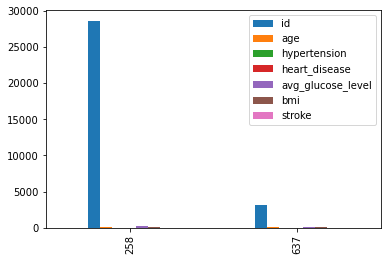

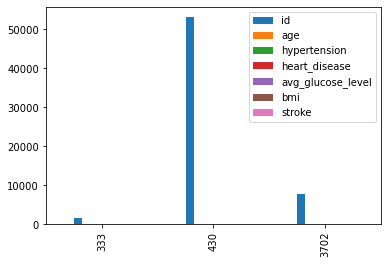

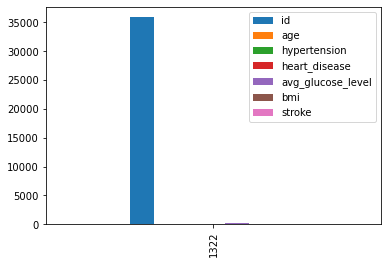

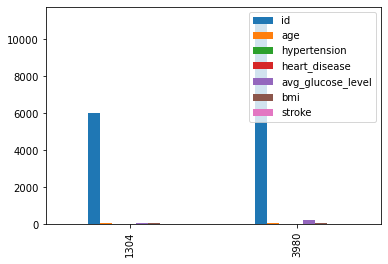

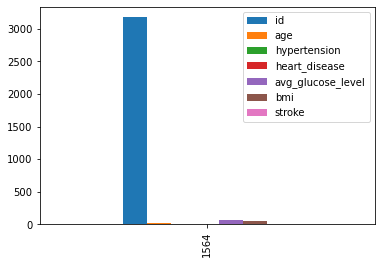

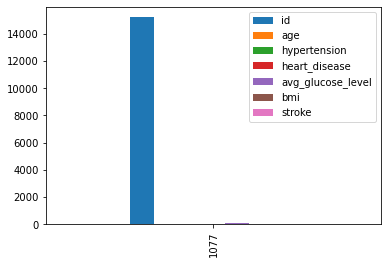

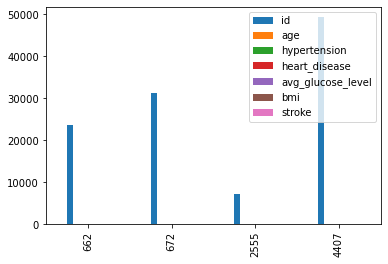

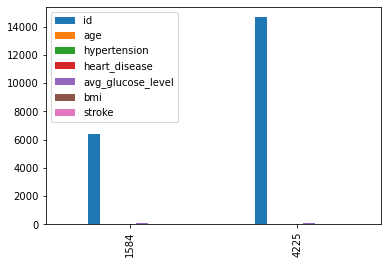

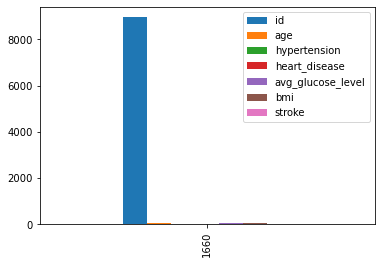

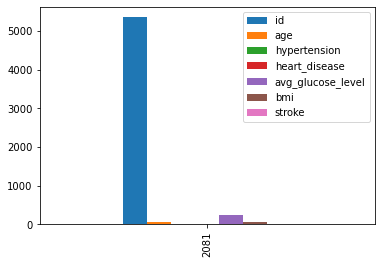

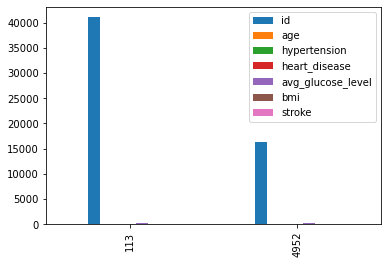

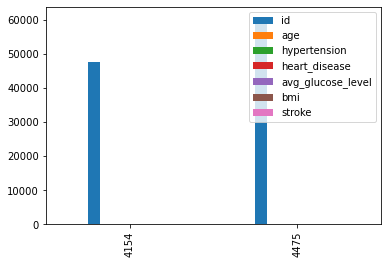

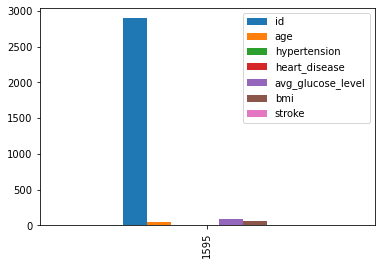

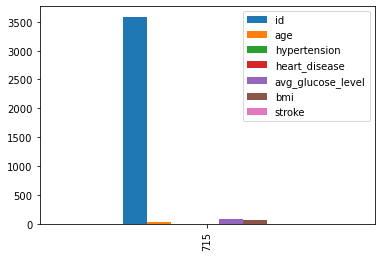

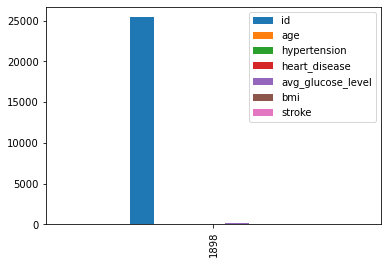

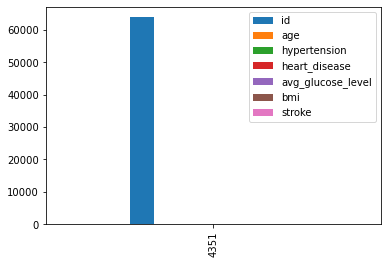

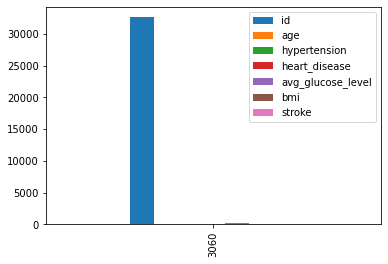

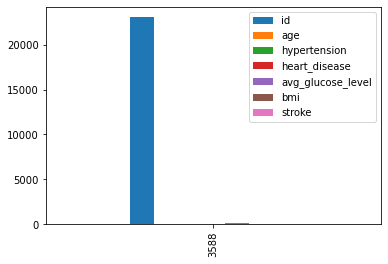

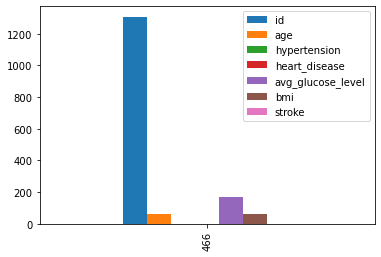

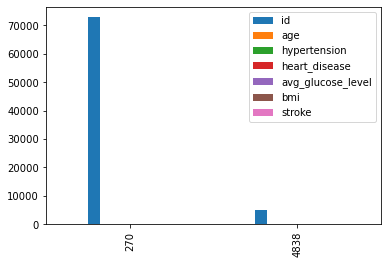

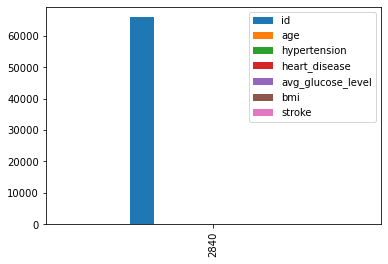

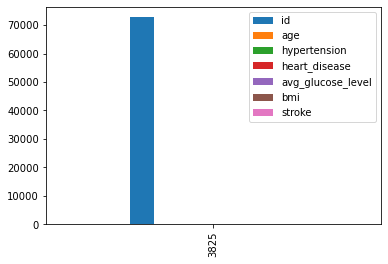

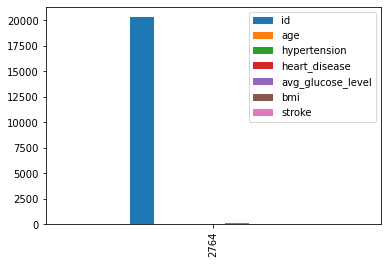

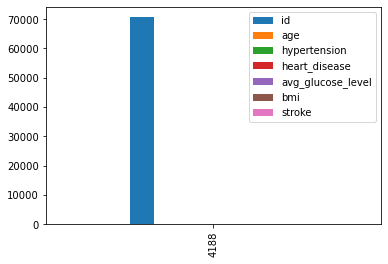

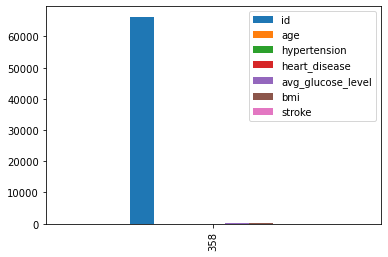

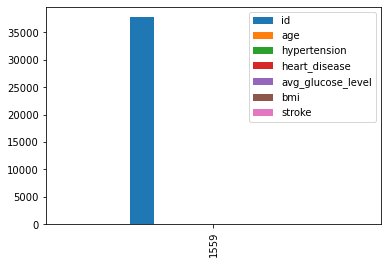

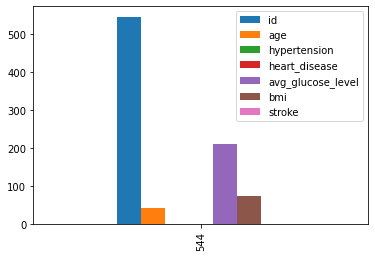

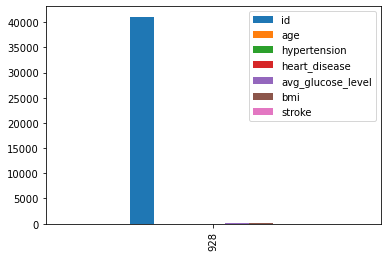

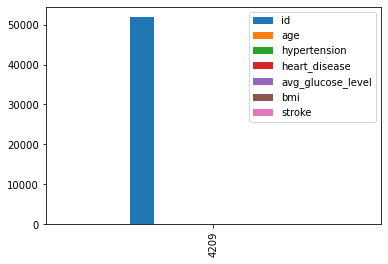

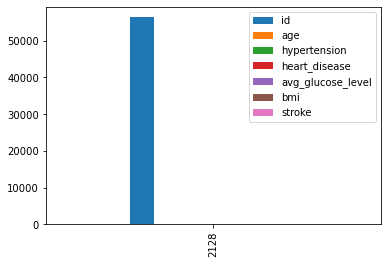

In [31]:
# LETS NOW CHECK ITS RELATIONS WITH other variables
health_status.plot.bar();

In [45]:
measure = df[['avg_glucose_level','stroke']].head(20)

In [46]:
measure.sort_values(by='avg_glucose_level')

avg_glucose_level  stroke
9               58.57       1
6               70.09       1
8               76.15       1
10              80.43       1
18              89.22       1
7               94.39       1
12             104.51       1
2              105.92       1
11             120.46       1
15             167.41       1
3              171.23       1
4              174.12       1
5              186.21       1
16             191.61       1
1              202.21       1
14             214.09       1
19             217.08       1
13             219.84       1
17             221.29       1
0              228.69       1

<AxesSubplot:xlabel='avg_glucose_level', ylabel='stroke'>

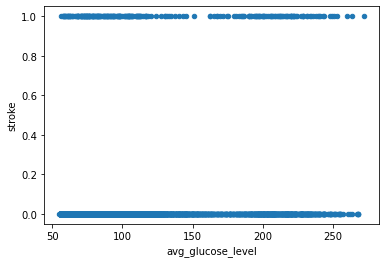

In [36]:
# lets check the relationship throughout all given datapoints in both attributes
df.plot.scatter('avg_glucose_level','stroke')

As our data is not accruate about measurements of stroke rates, thus the max insights we can derive here is that patients with higher glucose levels have a higher chance of strock, which is agreed upon by medicinal principles and can be checked here 
https://www.google.com/search?q=high+glucose+level+risks&oq=high+glucose+level+ri&aqs=chrome.0.0j69i57j0i22i30j0i390l2.7168j0j7&sourceid=chrome&ie=UTF-8

# lets now make a prediction using linear regression in uspervised machine learning algorithms

In [48]:
df

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level    bmi   smoking_status  \
0           Private          Urban             228.69  36.60  formerly smoked   
1     Self-employed          Rural             202.21  34.55     never smoked   
2           Private          Rural             105.92  32.50     never smoked   
3           Private          Urban             171.23  34.40           smokes   
4     Self-employed          Rural             174.12  24.00     never smoked   
...             ...            ...                ...    ...              ...   
5105        Private          Urban              83.75  29.30     never smoked   
5106  Self-employed          Urban             125.20  40.00     never smoked   
5107  Self-employed          Rural              82.99  30.60     never smoked   
5108        Private          Rural             166.29  25.60  formerly smoked   
5109       Govt_job          Urban              85.28  26.20          Unknown   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[5110 rows x 12 columns]

In [65]:
# lets drop unnessecary categorical columns 
df.drop(['gender'], axis=1, inplace=True)

In [66]:
df.drop(['smoking_status'], axis=1, inplace=True)

In [67]:
df.drop(['ever_married'], axis=1, inplace=True)

In [68]:
df.drop(['work_type'], axis=1, inplace=True)

In [69]:
df.drop(['Residence_type'], axis=1, inplace=True)

Lets se x and y variables to make predictions for strock

In [70]:
x = df.drop(['stroke'], axis=1)

In [71]:
y = df['stroke']

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as ttl

In [73]:
# lets split the training and testing data 

tx, tex, ty, tey = ttl(x, y, test_size=0.3, random_state=0)

In [74]:
Model_str = LinearRegression()

In [75]:
# now lets fit the training data 
Model_str = Model_str.fit(tx,ty)

In [77]:
Model_str.intercept_

-0.039604964329334226

In [78]:
Model_str.coef_

array([ 3.47715041e-08,  2.04813204e-03,  3.34073078e-02,  9.02350420e-02,
        2.48261512e-04, -1.26123592e-03])

In [79]:
# Now to predict with the test data 
Model_str.predict(tex)

array([ 0.22340781, -0.02500106,  0.06843639, ...,  0.03246926,
        0.12705217,  0.08275583])

In [81]:
prediction = Model_str.predict(tex)

# Our Prediction has been made and shows some level of accuracy based on the data we fed it, its not accurate because we havent taken into place Patient with already present health conditions based on their blood test analysis 

# Thus we should now Validate our datas accuracy and check where our errors have been made.

In [80]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [85]:
r2_score(prediction, tey)

-11.222698081595308

In [87]:
mean_absolute_error(prediction, tey)

0.09604952737867911

In [88]:
mean_squared_error(prediction, tey)

0.04436764217531656

# SO based on these results it is undoubtly correct that our models predictions are highly inaccurate as stated for the reason above because the accuracy of the data fed into it is not enough to amalgamate a prediction for strock without knowing the remaining blood history of the patient.
# However our model serves as good based model and benchmark on how to predict a strock using the right data for any future model